# Shaat Dikes paleomagnetic data analysis

## Import Python libraries

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Calculate present local field direction

In [2]:
Shaat_location_lat = 17.1 # N
Shaat_location_lon = 54.9 # E

Mirbat_plf_dec, Mirbat_plf_inc, _ = ipmag.igrf([2023, 0, Shaat_location_lat, Shaat_location_lon])
print('The present day geomagnetic field in the study location is:')
print('dec: ' + str(round(Mirbat_plf_dec,1)))
print('inc: ' + str(round(Mirbat_plf_inc,1)))

Mirbat_dipole_dec = 0
Mirbat_dipole_inc = ipmag.inc_from_lat(Shaat_location_lat)
print('')
print('The dipole field direction in the study location is:')
print('dec: ' + str(round(Mirbat_dipole_dec,1)))
print('inc: ' + str(round(Mirbat_dipole_inc,1)))

The present day geomagnetic field in the study location is:
dec: 0.9
inc: 23.9

The dipole field direction in the study location is:
dec: 0
inc: 31.6


## Load MagIC data tables and site table with more precise locations

Note that only the dikes in the Leger panel have a tilt-correction that we are confident about. 

**The other dikes need to have their SD_site_data['dir_tilt_correction'] == 100] rows deleted.**

In [3]:
SD_site_data = pd.read_csv('../data/pmag/sites.txt', sep='\t', header=1)
SD_specimen_data = pd.read_csv('../data/pmag/specimens.txt', sep='\t', header=1)

# get more precise site locations
SD_site_info = pd.read_csv('../data/field_data/site_locations.csv', sep=',', header=0, index_col='site')
SD_site_locations = pd.read_csv('../data/field_data/site_locations.csv', sep=',', header=0, index_col='site')[['latitude', 'longitude']]
# map site locations to site data
SD_site_data['lat'] = SD_site_locations['latitude'][SD_site_data['site']].tolist()
SD_site_data['lon'] = SD_site_locations['longitude'][SD_site_data['site']].tolist()

SD_site_data_gc = SD_site_data[SD_site_data['dir_tilt_correction'] == 0]
SD_site_data_tc = SD_site_data[SD_site_data['dir_tilt_correction'] == 100]
SD_specimen_data_gc = SD_specimen_data[SD_specimen_data['dir_tilt_correction'] == 0]
SD_specimen_data_tc = SD_specimen_data[SD_specimen_data['dir_tilt_correction'] == 100]

In [4]:
SD_site_info

,latitude,longitude,thickness,geologic_classes,geologic_types,lithologies,lithology,age_low,age_high,age_unit,orientation,locale,comment
site,,,,,,,,,,,,,
SD1,17.0513,54.8528,3.30,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN
SD2,17.0520,54.8509,2.70,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN
SD3,17.0517,54.8503,3.30,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN
SD4,17.0519,54.8565,1.60,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN
SD5,17.0528,54.8583,3.60,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN
SD6,17.0540,54.8590,2.50,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN
SD7,17.0547,54.8589,2.50,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN
SD8,17.0566,54.8610,1.40,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN
SD9,17.0583,54.8624,1.70,Igneous,Volcanic Dike,Mafic Dike,mafic,726,735,Ma,NNW-SSE,southwest,NaN


## Low-temperature component

- Typically the low temperature component is removed largely by the low-temperature (77 K) demagnetization step and is typically fully removed by thermal demagnetization to 250ºC although it can persist to higher temperatures. 
- The directions correspond to the present-day field and present-day expected dipole direction.
- This demagnetization behavior and direction is consistent with the low-temperature component being a recently acquired viscous remanent magnetization.

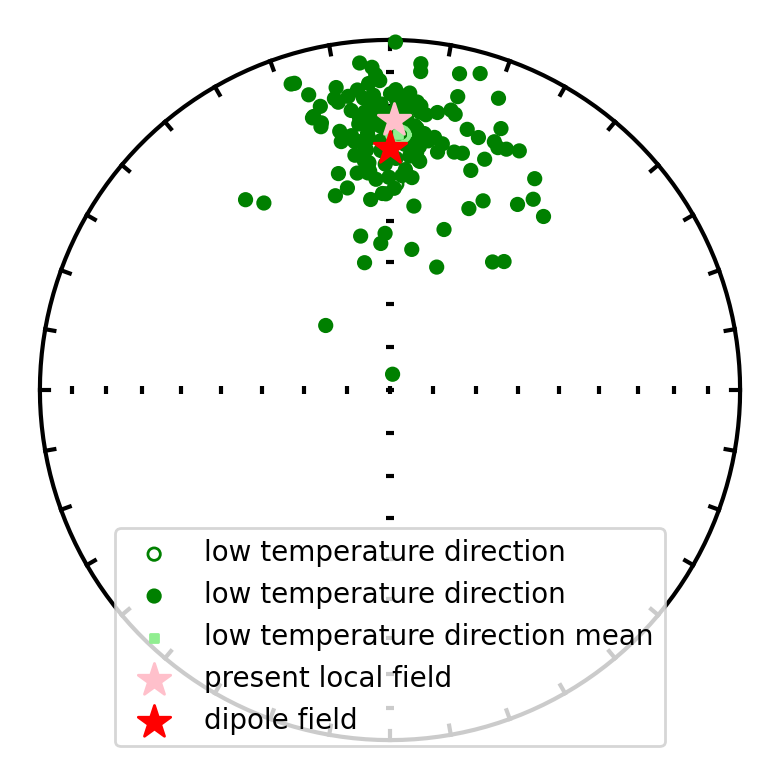

In [5]:
SD_specimen_lt_gc = SD_specimen_data_gc[SD_specimen_data_gc['dir_comp'] == 'lt'].reset_index(drop=True)
SD_specimen_lt_gc_mean = ipmag.fisher_mean(SD_specimen_lt_gc['dir_dec'], SD_specimen_lt_gc['dir_inc'])

plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(SD_specimen_lt_gc['dir_dec'], SD_specimen_lt_gc['dir_inc'], color='green', marker='o', label='low temperature direction')
ipmag.plot_di_mean(SD_specimen_lt_gc_mean['dec'], SD_specimen_lt_gc_mean['inc'], SD_specimen_lt_gc_mean['alpha95'], 
                   color='lightgreen', marker='s', markersize = 10, label='low temperature direction mean')
ipmag.plot_di(Mirbat_plf_dec, Mirbat_plf_inc, color='pink', marker='*', markersize = 150, label='present local field')
ipmag.plot_di(Mirbat_dipole_dec, Mirbat_dipole_inc, color='red', marker='*', markersize = 150, label='dipole field')
plt.legend(loc='lower center')
plt.show()

## Shaat dikes magnetite component

We are confident about tilt corrections for the Leger dikes panel and will therefore focus on the data from the panel. The fits named 'mag' within the MagIC files were fit to the characteristic unblocking temperatures of low-titanium titanomagnetite.

The main set of dikes are those in a NNW-SSE orientation. They cross-cut dikes in a E-W orientation. We will split the dikes into these two populations so they can be plotted accordingly.

In [6]:
SD_sites_Leger_NNW = SD_site_info[(SD_site_info['locale'] == 'Leger') & (SD_site_info['orientation'] == 'NNW-SSE')]
SD_sites_Leger_NNW_gc = SD_site_data_gc[SD_site_data_gc['site'].isin(SD_sites_Leger_NNW.index)].reset_index(drop=True)
SD_sites_Leger_NNW_tc = SD_site_data_tc[SD_site_data_tc['site'].isin(SD_sites_Leger_NNW.index)].reset_index(drop=True)
SD_sites_Leger_NNW_mag_gc = SD_sites_Leger_NNW_gc[SD_sites_Leger_NNW_gc['dir_comp_name'] == 'mag'].reset_index(drop=True)
SD_sites_Leger_NNW_mag_tc = SD_sites_Leger_NNW_tc[SD_sites_Leger_NNW_tc['dir_comp_name'] == 'mag'].reset_index(drop=True)

In [7]:
SD_sites_Leger_E = SD_site_info[(SD_site_info['locale'] == 'Leger') & (SD_site_info['orientation'] == 'E-W')]
SD_sites_Leger_E_gc = SD_site_data_gc[SD_site_data_gc['site'].isin(SD_sites_Leger_E.index)].reset_index(drop=True)
SD_sites_Leger_E_tc = SD_site_data_tc[SD_site_data_tc['site'].isin(SD_sites_Leger_E.index)].reset_index(drop=True)
SD_sites_Leger_E_mag_gc = SD_sites_Leger_E_gc[SD_sites_Leger_E_gc['dir_comp_name'] == 'mag'].reset_index(drop=True)
SD_sites_Leger_E_mag_tc = SD_sites_Leger_E_tc[SD_sites_Leger_E_tc['dir_comp_name'] == 'mag'].reset_index(drop=True)

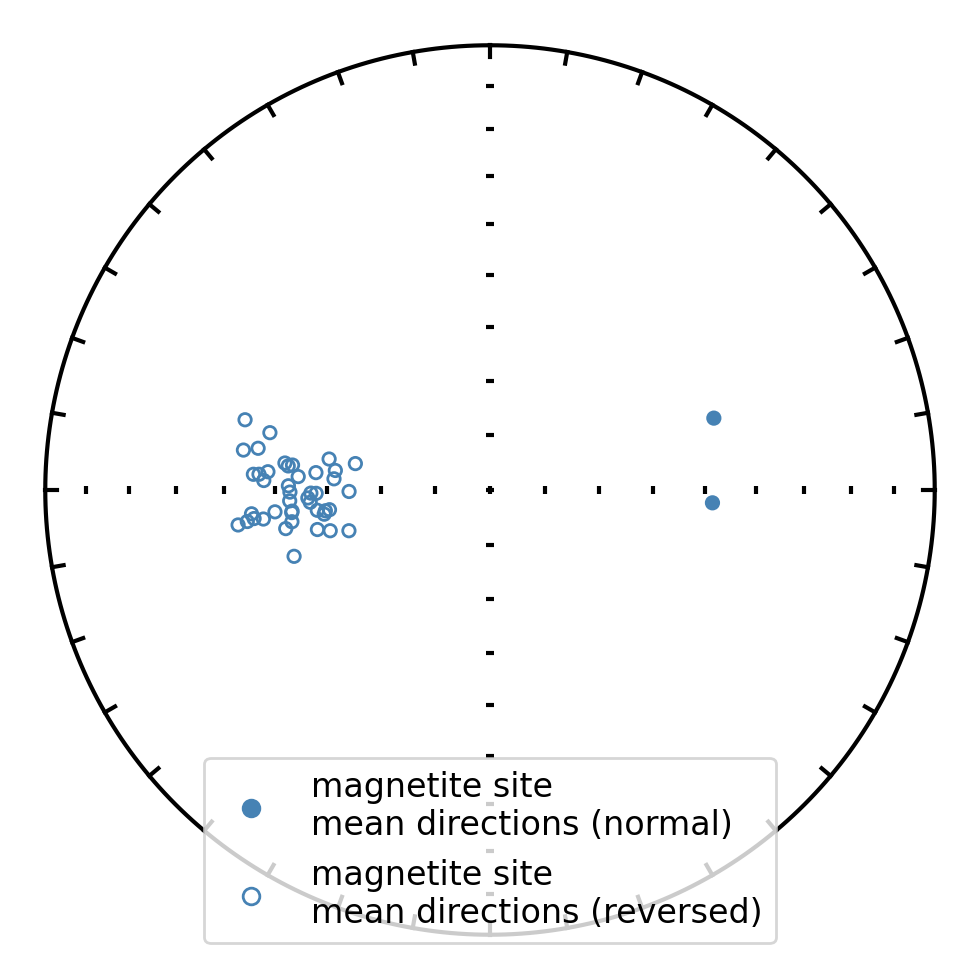

mean of geographic coordinates NNW-SSE magnetite site directions:

Dec: 88.8  Inc: 53.2
Number of directions in mean (n): 45
Angular radius of 95% confidence (a_95): 2.1
Precision parameter (k) estimate: 100.1

paleolatitude calculated from mean inclination: 33.8


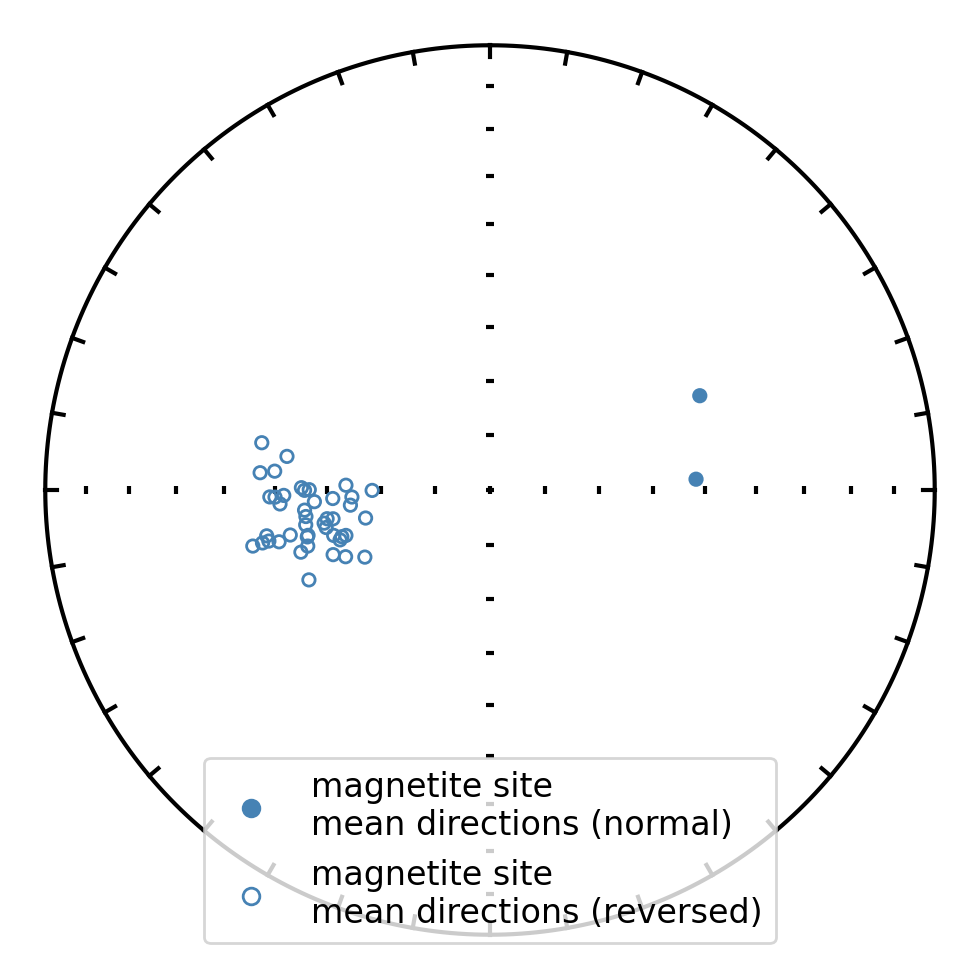

mean of geographic coordinates NNW-SSE magnetite site directions:

Dec: 81.0  Inc: 55.9
Number of directions in mean (n): 45
Angular radius of 95% confidence (a_95): 2.1
Precision parameter (k) estimate: 100.2

paleolatitude calculated from mean inclination: 36.4


In [8]:
plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_gc['dir_dec'], 
              SD_sites_Leger_NNW_mag_gc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
# Create custom handles for the legend
normal_handle = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='magnetite site\nmean directions (normal)')
reversed_handle = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='magnetite site\nmean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle, reversed_handle], loc='lower center', fontsize=12)
plt.show()

SD_sites_Leger_NNW_mag_gc_diblock = ipmag.make_di_block(SD_sites_Leger_NNW_mag_gc['dir_dec'],
                                                        SD_sites_Leger_NNW_mag_gc['dir_inc'])
SD_sites_Leger_NNW_mag_gc_unified = pmag.flip(SD_sites_Leger_NNW_mag_gc_diblock, combine=True)
SD_sites_Leger_NNW_mag_gc_unified_mean = ipmag.fisher_mean(di_block=SD_sites_Leger_NNW_mag_gc_unified)

print('mean of geographic coordinates NNW-SSE magnetite site directions:')
print('')
ipmag.print_direction_mean(SD_sites_Leger_NNW_mag_gc_unified_mean)
plat_from_inc = ipmag.lat_from_inc(SD_sites_Leger_NNW_mag_gc_unified_mean['inc'])
print('')
print('paleolatitude calculated from mean inclination: ' + str(round(plat_from_inc,1)))

plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_tc['dir_dec'], 
              SD_sites_Leger_NNW_mag_tc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
# Create custom handles for the legend
normal_handle = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='magnetite site\nmean directions (normal)')
reversed_handle = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='magnetite site\nmean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle, reversed_handle], loc='lower center', fontsize=12)

plt.show()

SD_sites_Leger_NNW_mag_tc_diblock = ipmag.make_di_block(SD_sites_Leger_NNW_mag_tc['dir_dec'],
                                                        SD_sites_Leger_NNW_mag_tc['dir_inc'])
SD_sites_Leger_NNW_mag_tc_unified = pmag.flip(SD_sites_Leger_NNW_mag_tc_diblock, combine=True)
SD_sites_Leger_NNW_mag_tc_unified_mean = ipmag.fisher_mean(di_block=SD_sites_Leger_NNW_mag_tc_unified)

print('mean of geographic coordinates NNW-SSE magnetite site directions:')
print('')
ipmag.print_direction_mean(SD_sites_Leger_NNW_mag_tc_unified_mean)
plat_from_inc = ipmag.lat_from_inc(SD_sites_Leger_NNW_mag_tc_unified_mean['inc'])
print('')
print('paleolatitude calculated from mean inclination: ' + str(round(plat_from_inc,1)))

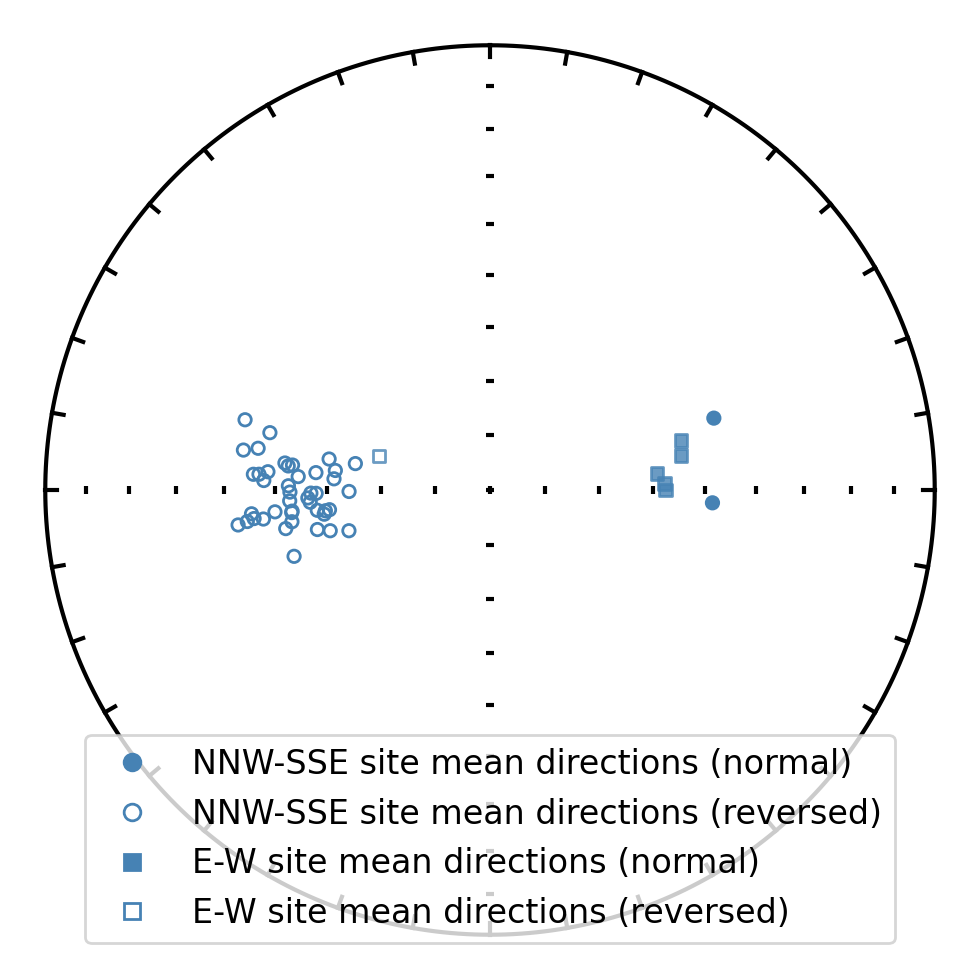

mean of geographic coordinates all magnetite site directions:

Dec: 88.5  Inc: 53.9
Number of directions in mean (n): 51
Angular radius of 95% confidence (a_95): 2.0
Precision parameter (k) estimate: 98.1

paleolatitude calculated from mean inclination: 34.4


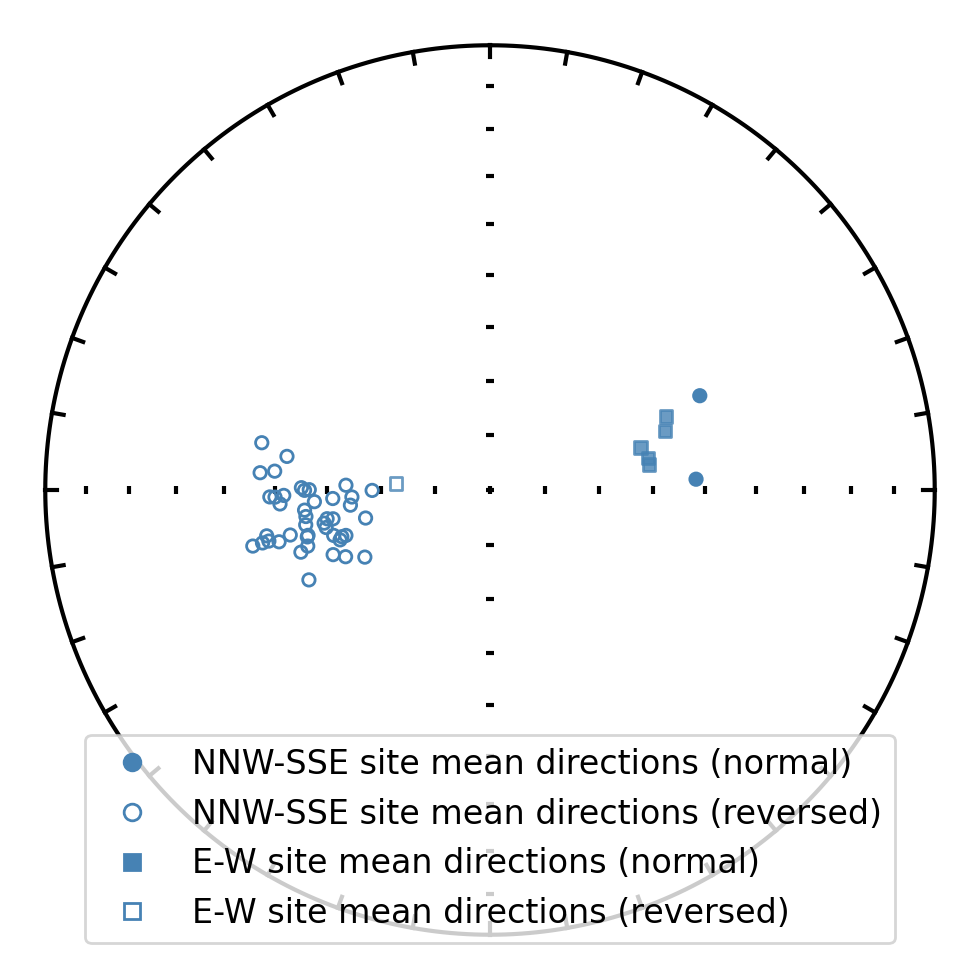

mean of tilt-corrected coordinates all magnetite site directions:

Dec: 80.5  Inc: 56.5
Number of directions in mean (n): 51
Angular radius of 95% confidence (a_95): 2.0
Precision parameter (k) estimate: 98.2

paleolatitude calculated from mean inclination: 37.1


In [9]:
plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_gc['dir_dec'], 
              SD_sites_Leger_NNW_mag_gc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD_sites_Leger_E_mag_gc['dir_dec'], 
              SD_sites_Leger_E_mag_gc['dir_inc'], 
              color='steelblue', marker='s', label='magnetite site\nmean directions',
              markersize=20,alpha=0.8)
# Create custom handles for the legend
normal_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='NNW-SSE site mean directions (normal)')
reversed_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='NNW-SSE site mean directions (reversed)')
normal_handle_E = plt.Line2D([], [], color='steelblue', marker='s', 
                           linestyle='None', label='E-W site mean directions (normal)')
reversed_handle_E = plt.Line2D([], [], color='steelblue', marker='s', 
                             linestyle='None', mfc='none', label='E-W site mean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle_NNW, reversed_handle_NNW, normal_handle_E, reversed_handle_E], 
           loc='lower center', fontsize=12)
plt.show()

SD_sites_Leger_all_mag_dec_gc = SD_sites_Leger_NNW_mag_gc['dir_dec'].tolist() + SD_sites_Leger_E_mag_gc['dir_dec'].tolist()
SD_sites_Leger_all_mag_inc_gc = SD_sites_Leger_NNW_mag_gc['dir_inc'].tolist() + SD_sites_Leger_E_mag_gc['dir_inc'].tolist()

SD_sites_Leger_all_mag_gc_diblock = ipmag.make_di_block(SD_sites_Leger_all_mag_dec_gc, SD_sites_Leger_all_mag_inc_gc)
SD_sites_Leger_all_mag_gc_unified = pmag.flip(SD_sites_Leger_all_mag_gc_diblock, combine=True)
SD_sites_Leger_all_mag_gc_unified_mean = ipmag.fisher_mean(di_block=SD_sites_Leger_all_mag_gc_unified)

print('mean of geographic coordinates all magnetite site directions:')
print('')
ipmag.print_direction_mean(SD_sites_Leger_all_mag_gc_unified_mean)
plat_from_inc = ipmag.lat_from_inc(SD_sites_Leger_all_mag_gc_unified_mean['inc'])
print('')
print('paleolatitude calculated from mean inclination: ' + str(round(plat_from_inc,1)))

plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_tc['dir_dec'], 
              SD_sites_Leger_NNW_mag_tc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD_sites_Leger_E_mag_tc['dir_dec'], 
              SD_sites_Leger_E_mag_tc['dir_inc'], 
              color='steelblue', marker='s', label='magnetite site\nmean directions',
              markersize=20,alpha=0.8)
# Create custom handles for the legend
normal_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='NNW-SSE site mean directions (normal)')
reversed_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='NNW-SSE site mean directions (reversed)')
normal_handle_E = plt.Line2D([], [], color='steelblue', marker='s', 
                           linestyle='None', label='E-W site mean directions (normal)')
reversed_handle_E = plt.Line2D([], [], color='steelblue', marker='s', 
                             linestyle='None', mfc='none', label='E-W site mean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle_NNW, reversed_handle_NNW, normal_handle_E, reversed_handle_E], 
           loc='lower center', fontsize=12)
plt.savefig('./output/SD_site_data_Leger_mag_tc.pdf')
plt.show()

SD_sites_Leger_all_mag_dec_tc = SD_sites_Leger_NNW_mag_tc['dir_dec'].tolist() + SD_sites_Leger_E_mag_tc['dir_dec'].tolist()
SD_sites_Leger_all_mag_inc_tc = SD_sites_Leger_NNW_mag_tc['dir_inc'].tolist() + SD_sites_Leger_E_mag_tc['dir_inc'].tolist()

SD_sites_Leger_all_mag_tc_diblock = ipmag.make_di_block(SD_sites_Leger_all_mag_dec_tc, SD_sites_Leger_all_mag_inc_tc)
SD_sites_Leger_all_mag_tc_unified = pmag.flip(SD_sites_Leger_all_mag_tc_diblock, combine=True)
SD_sites_Leger_all_mag_tc_unified_mean = ipmag.fisher_mean(di_block=SD_sites_Leger_all_mag_tc_unified)

print('mean of tilt-corrected coordinates all magnetite site directions:')
print('')
ipmag.print_direction_mean(SD_sites_Leger_all_mag_tc_unified_mean)
plat_from_inc = ipmag.lat_from_inc(SD_sites_Leger_all_mag_tc_unified_mean['inc'])
print('')
print('paleolatitude calculated from mean inclination: ' + str(round(plat_from_inc,1)))

### Plot with dated dikes

SD50 is a dated felsic dike that has a magnetite component sitting within the main population of reversed mafic dike directions
SD51 is a mafic dike collected in baked zone of Leger granite

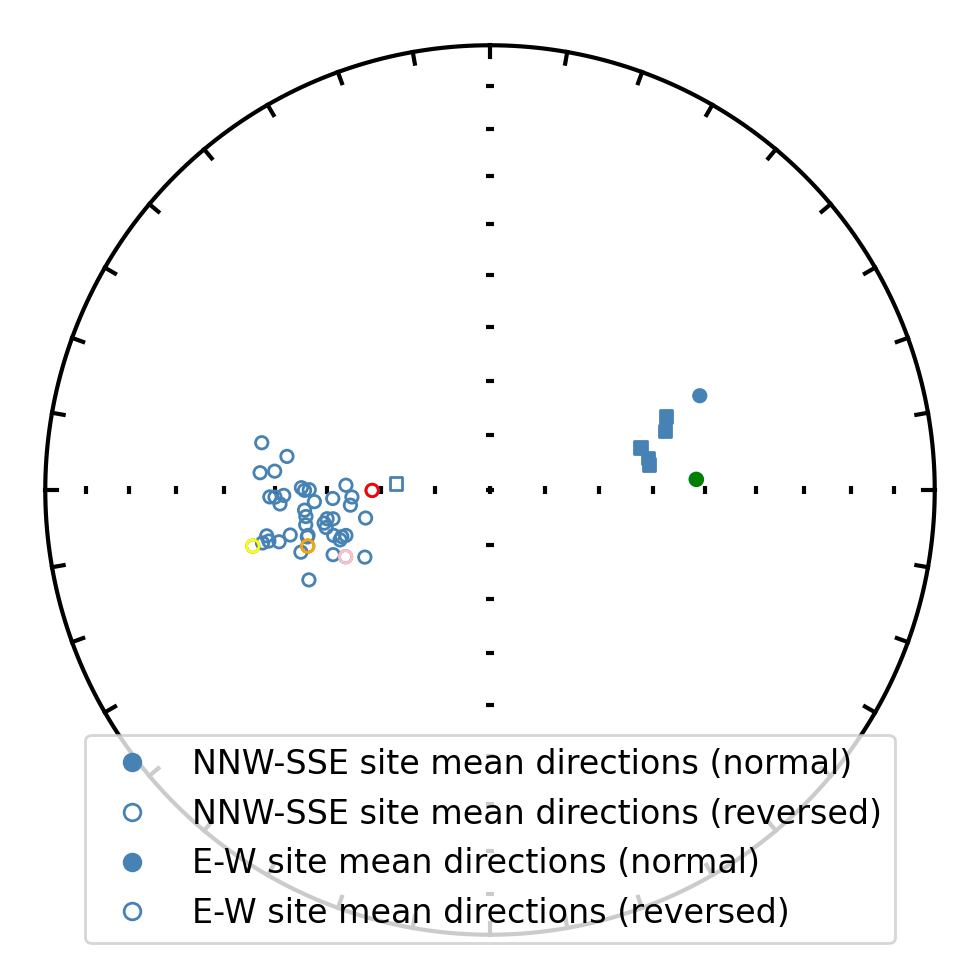

In [10]:
SD37_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD37'].reset_index(drop=True)
SD39_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD39'].reset_index(drop=True)
SD50_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD50'].reset_index(drop=True)
SD51_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD51'].reset_index(drop=True)
SD95_site_data_mag = SD_sites_Leger_NNW_mag_tc[SD_sites_Leger_NNW_mag_tc['site'] == 'SD95'].reset_index(drop=True)

plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(SD_sites_Leger_NNW_mag_tc['dir_dec'], 
              SD_sites_Leger_NNW_mag_tc['dir_inc'], 
              color='steelblue', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD_sites_Leger_E_mag_tc['dir_dec'], 
              SD_sites_Leger_E_mag_tc['dir_inc'], 
              color='steelblue', marker='s', label='magnetite site\nmean directions',
              markersize=20)

ipmag.plot_di(SD37_site_data_mag['dir_dec'], 
              SD37_site_data_mag['dir_inc'], 
              color='green', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD39_site_data_mag['dir_dec'], 
              SD39_site_data_mag['dir_inc'], 
              color='yellow', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD50_site_data_mag['dir_dec'], 
              SD50_site_data_mag['dir_inc'], 
              color='red', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD51_site_data_mag['dir_dec'], 
              SD51_site_data_mag['dir_inc'], 
              color='orange', marker='o', label='magnetite site\nmean directions',
              markersize=20)
ipmag.plot_di(SD95_site_data_mag['dir_dec'], 
              SD95_site_data_mag['dir_inc'], 
              color='pink', marker='o', label='magnetite site\nmean directions',
              markersize=20)

normal_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='NNW-SSE site mean directions (normal)')
reversed_handle_NNW = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='NNW-SSE site mean directions (reversed)')
normal_handle_E = plt.Line2D([], [], color='steelblue', marker='o', 
                           linestyle='None', label='E-W site mean directions (normal)')
reversed_handle_E = plt.Line2D([], [], color='steelblue', marker='o', 
                             linestyle='None', mfc='none', label='E-W site mean directions (reversed)')

# Add legend
plt.legend(handles=[normal_handle_NNW, reversed_handle_NNW, normal_handle_E, reversed_handle_E], 
           loc='lower center', fontsize=12)

plt.savefig('./output/SD_site_data_Leger_mag_geochron.pdf', dpi=300)
plt.show()

### Reversal tests

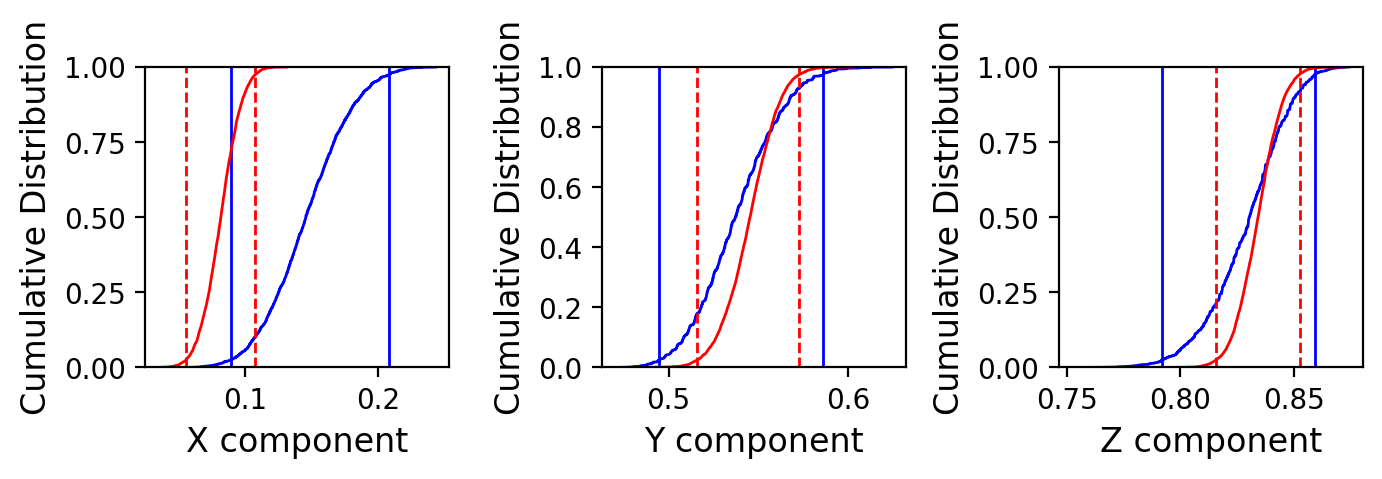

Pass


1

In [11]:
ipmag.reversal_test_bootstrap(dec=SD_sites_Leger_all_mag_dec_tc, 
                              inc=SD_sites_Leger_all_mag_inc_tc)

In [12]:
ipmag.reversal_test_MM1990(dec=SD_sites_Leger_all_mag_dec_tc, 
                           inc=SD_sites_Leger_all_mag_inc_tc)

Results of Watson V test: 

Watson's V:           3.4
Critical value of V:  7.2
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.7
Critical angle for M&M1990:   5.5
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.7442406779175474, 5.482342509718767, 'B')

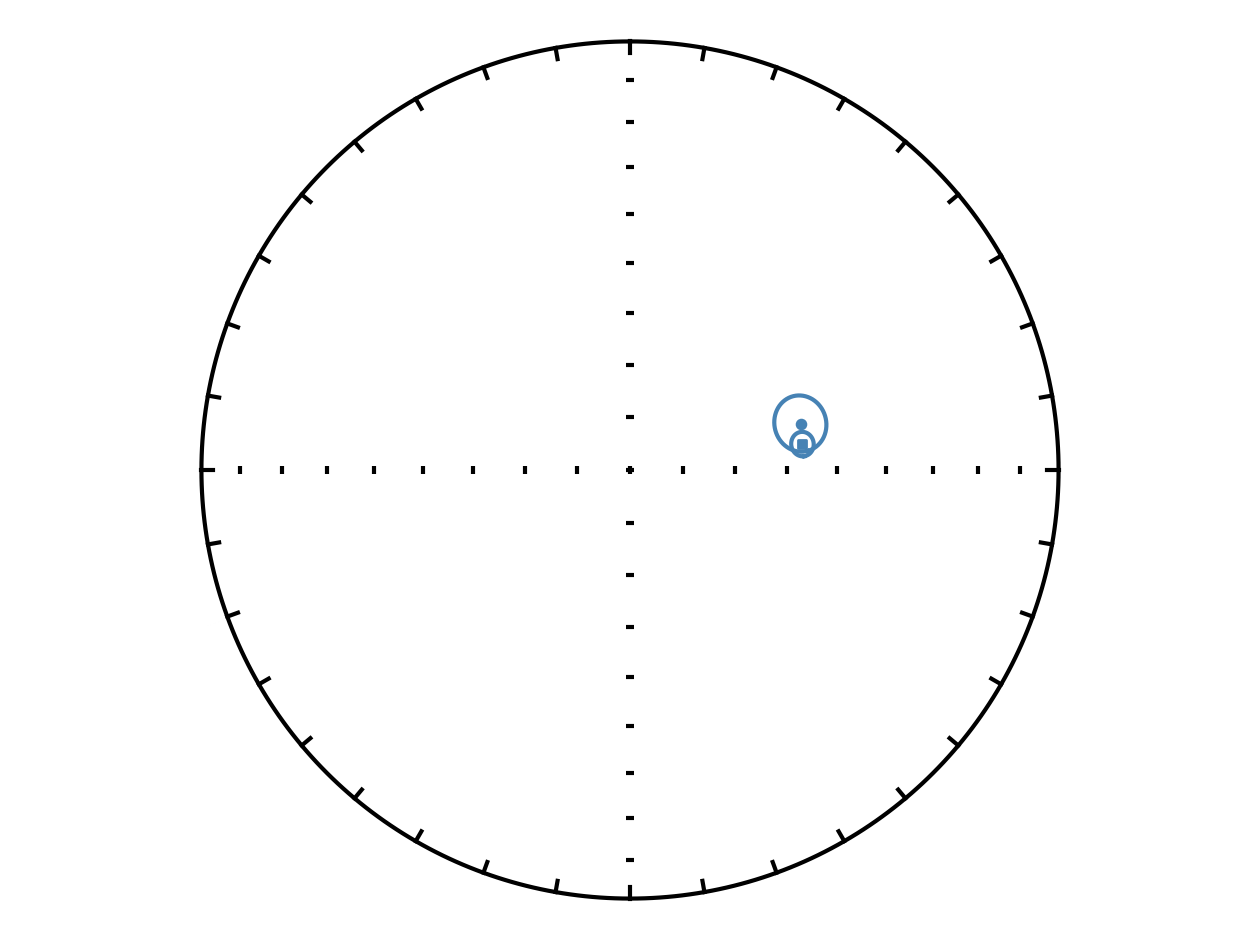

In [13]:
combined_di_block = ipmag.make_di_block(SD_sites_Leger_all_mag_dec_tc, SD_sites_Leger_all_mag_inc_tc)

normal, reversed = pmag.flip(combined_di_block)

N_mean = ipmag.fisher_mean(di_block=normal)
R_mean = ipmag.fisher_mean(di_block=reversed)

ipmag.plot_net()
ipmag.plot_di_mean(N_mean['dec'], N_mean['inc'], N_mean['alpha95'], color='steelblue', marker='o', markersize=10)
ipmag.plot_di_mean(R_mean['dec'], R_mean['inc'], R_mean['alpha95'], color='steelblue', marker='s', markersize=10)

In [14]:
ipmag.common_mean_bayes(normal, reversed)

Common mean: strong support


(26.50798352757919, 0.9636469173032108, 'Common mean: strong support')

### Paleomagnetic pole calculation

In [15]:
SD_sites_Leger_NNW_vgp_lon = []
SD_sites_Leger_NNW_vgp_lat = []
SD_sites_Leger_E_vgp_lon = []
SD_sites_Leger_E_vgp_lat = []

for i in range(len(SD_sites_Leger_NNW_mag_tc)):
    vgp_lon_i, vgp_lat_i, dp, dm = pmag.dia_vgp(SD_sites_Leger_NNW_mag_tc['dir_dec'][i], 
                                                SD_sites_Leger_NNW_mag_tc['dir_inc'][i], 
                                                1,
                                                SD_sites_Leger_NNW_mag_tc['lat'][i], 
                                                SD_sites_Leger_NNW_mag_tc['lon'][i])
    if vgp_lon_i > 180:
        vgp_lon_i = vgp_lon_i-180
        vgp_lat_i = -vgp_lat_i
        
    SD_sites_Leger_NNW_vgp_lon.append(vgp_lon_i)
    SD_sites_Leger_NNW_vgp_lat.append(vgp_lat_i)
    
for i in range(len(SD_sites_Leger_E_mag_tc)):
    vgp_lon_i, vgp_lat_i, dp, dm = pmag.dia_vgp(SD_sites_Leger_E_mag_tc['dir_dec'][i], 
                                                SD_sites_Leger_E_mag_tc['dir_inc'][i], 
                                                1,
                                                SD_sites_Leger_E_mag_tc['lat'][i], 
                                                SD_sites_Leger_E_mag_tc['lon'][i])
    if vgp_lon_i > 180:
        vgp_lon_i = vgp_lon_i-180
        vgp_lat_i = -vgp_lat_i
        
    SD_sites_Leger_E_vgp_lon.append(vgp_lon_i)
    SD_sites_Leger_E_vgp_lat.append(vgp_lat_i)
    
mean_Shaat_pole_NNW = ipmag.fisher_mean(SD_sites_Leger_NNW_vgp_lon, SD_sites_Leger_NNW_vgp_lat)
print('mean pole of NNW-SSE magnetite site VGPs:')
ipmag.print_pole_mean(mean_Shaat_pole_NNW)
print('')
Shaat_NNW_pole_colat = pmag.angle([mean_Shaat_pole_NNW['dec'], mean_Shaat_pole_NNW['inc']], [Shaat_location_lon, Shaat_location_lat])
Shaat_NNW_pole_paleolat = 90 - Shaat_NNW_pole_colat[0]
print('paleolatitude of NNW-SSE magnetite pole:')
print(round(Shaat_NNW_pole_paleolat,1))
print('')
print('')

combined_vgp_lon = SD_sites_Leger_NNW_vgp_lon + SD_sites_Leger_E_vgp_lon
combined_vgp_lat = SD_sites_Leger_NNW_vgp_lat + SD_sites_Leger_E_vgp_lat

mean_Shaat_pole_all = ipmag.fisher_mean(combined_vgp_lon, combined_vgp_lat)
print('mean pole of all magnetite site VGPs:')
ipmag.print_pole_mean(mean_Shaat_pole_all)
print('')
Shaat_all_pole_colat = pmag.angle([mean_Shaat_pole_all['dec'], mean_Shaat_pole_all['inc']], [Shaat_location_lon, Shaat_location_lat])
Shaat_all_pole_paleolat = 90 - Shaat_all_pole_colat[0]
print('paleolatitude of all magnetite pole:')
print(round(Shaat_all_pole_paleolat,1))

mean pole of NNW-SSE magnetite site VGPs:
Plon: 110.8  Plat: 17.3
Number of directions in mean (n): 45
Angular radius of 95% confidence (A_95): 2.6
Precision parameter (k) estimate: 67.6

paleolatitude of NNW-SSE magnetite pole:
36.8


mean pole of all magnetite site VGPs:
Plon: 110.1  Plat: 17.8
Number of directions in mean (n): 51
Angular radius of 95% confidence (A_95): 2.5
Precision parameter (k) estimate: 65.1

paleolatitude of all magnetite pole:
37.5


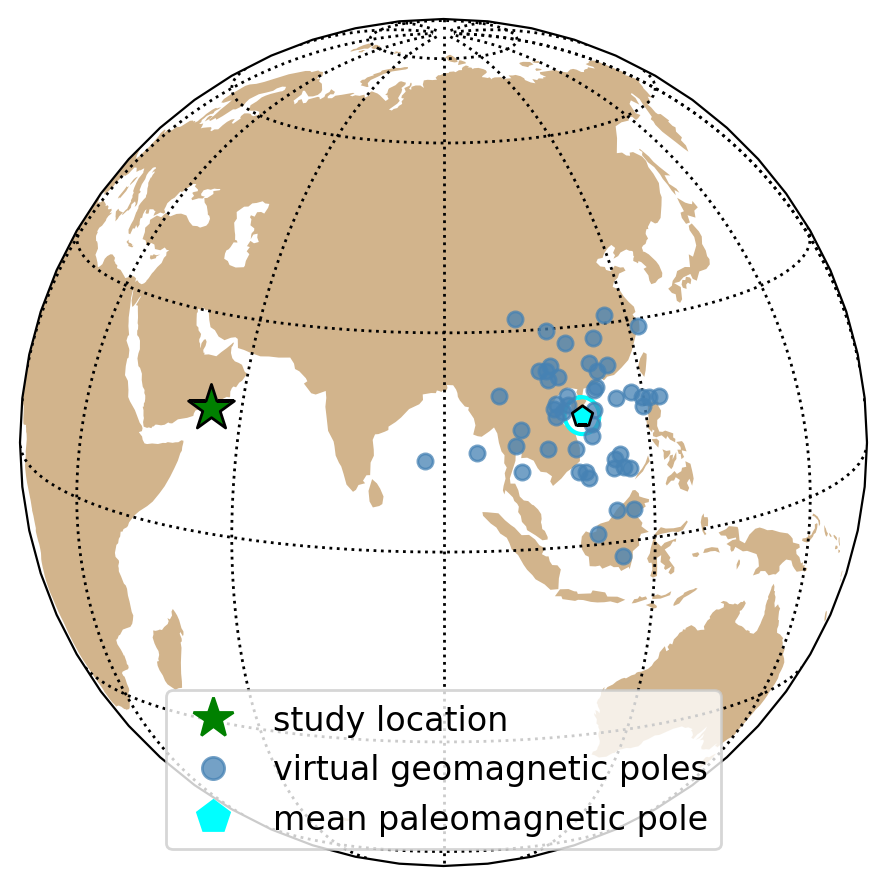

In [16]:
Mirbat_area_lon = 54.9426
Mirbat_area_lat = 17.1110

map_axis = ipmag.make_orthographic_map(central_longitude=90,central_latitude=15,
                                       figsize=(5.5,5.5),land_edge_color=None)
ipmag.plot_vgp(map_axis,vgp_lon=SD_sites_Leger_NNW_vgp_lon,
               vgp_lat=SD_sites_Leger_NNW_vgp_lat,color='steelblue',
               markersize=30,zorder=20,edge=None,alpha=0.75)
ipmag.plot_vgp(map_axis,vgp_lon=SD_sites_Leger_E_vgp_lon,
               vgp_lat=SD_sites_Leger_E_vgp_lat,color='steelblue',
               markersize=30,zorder=20,edge=None,alpha=0.75)
ipmag.plot_pole(map_axis, mean_Shaat_pole_all['dec'], mean_Shaat_pole_all['inc'], mean_Shaat_pole_all['alpha95'], 
                marker='p',color='aqua', markersize=60)
ipmag.plot_vgp(map_axis,vgp_lon=Mirbat_area_lon,vgp_lat=Mirbat_area_lat,color='green',
               marker='*',markersize=300,zorder=20)
# Create custom legend elements
study_loc = mlines.Line2D([], [], color='green', marker='*', linestyle='None', markersize=15, label='study location')
vgps = mlines.Line2D([], [], color='steelblue', marker='o', linestyle='None', markersize=8, alpha=0.75, label='virtual geomagnetic poles')
mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='mean paleomagnetic pole')

# Add the legend to the plot
plt.legend(handles=[study_loc, vgps, mean_pole], loc='lower center', fontsize=12)

plt.savefig('./output/SD_site_data_Leger_mag_pole.pdf', dpi=300)

{'Mode': 'Mode 1',
 'Dec': 110.12329842886388,
 'Inc': 17.808895436468056,
 'N': 51,
 'Mu': 0.988723925777768,
 'Mu_critical': 1.207,
 'Me': 0.6816484620200829,
 'Me_critical': 1.094,
 'Test_result': 'Consistent with Fisher distribution'}

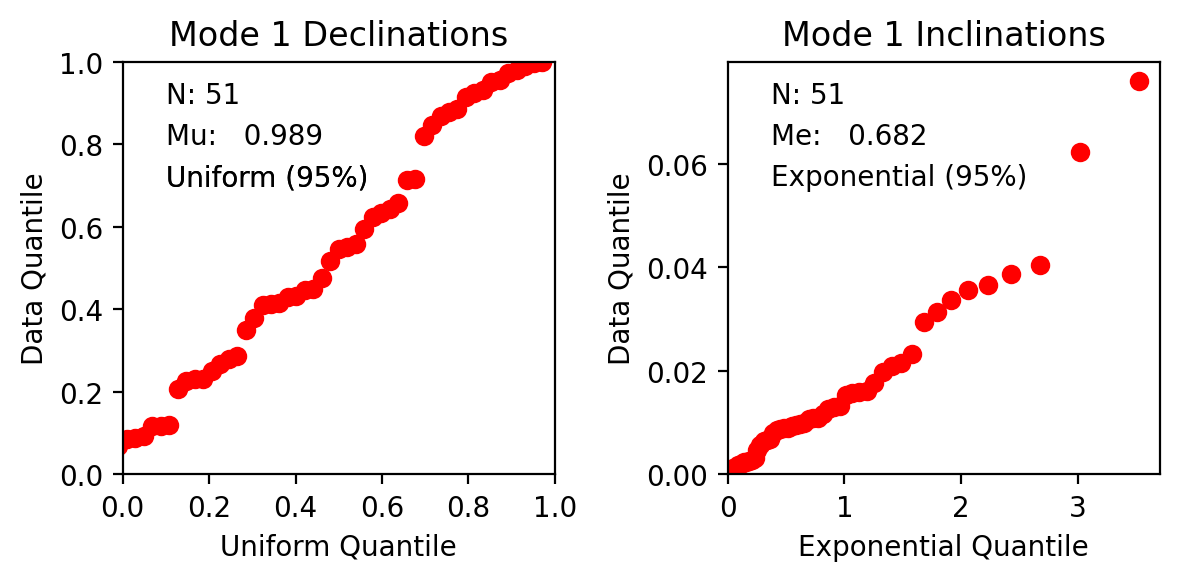

In [17]:
ipmag.fishqq(lon=combined_vgp_lon, lat=combined_vgp_lat)

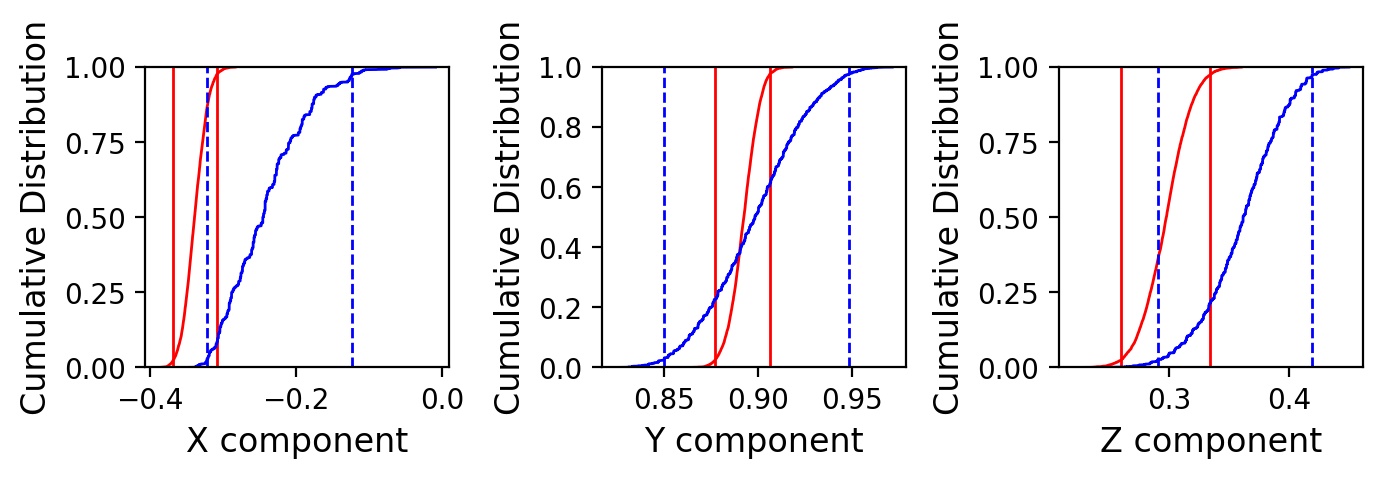

Pass


1

In [18]:
NNW_vgps = ipmag.make_di_block(SD_sites_Leger_NNW_vgp_lon, SD_sites_Leger_NNW_vgp_lat, unit_vector=False)
E_vgps = ipmag.make_di_block(SD_sites_Leger_E_vgp_lon, SD_sites_Leger_E_vgp_lat, unit_vector=False)
ipmag.common_mean_bootstrap(NNW_vgps, E_vgps)

In [19]:
ipmag.common_mean_bayes(NNW_vgps, E_vgps)

Common mean: positive support


(5.563899918050939, 0.8476515467199663, 'Common mean: positive support')

In [20]:
def Deenen_A_95min(N):
    A_95=12*N**(-0.4)
    return A_95
    
def Deenen_A_95max(N):
    A_95=82*N**(-0.63)
    return A_95 

def Deenen_test(N,A_95): 
    
    Deenen_min = Deenen_A_95min(N)
    Deenen_max = Deenen_A_95max(N)
    
    if A_95 < Deenen_min:
        print('A_95 of ' + str(round(A_95,1)) + ' is too small for Deenen criteria of ' +
              str(round(Deenen_min,1)) + ' for this number of sites')
    elif A_95 > Deenen_max:
        print('A_95 of ' + str(round(A_95,1)) + ' is too large for Deenen criteria of ' +
              str(round(Deenen_max,1)) + ' for this number of sites')
    else:
        print('A_95 of ' + str(round(A_95,1)) + ' passes Deenen et al. (2011) criteria of being between ' +
              str(round(Deenen_min,1)) + ' and ' + str(round(Deenen_max,1)) + ' for this number of sites')

In [21]:
Deenen_test(mean_Shaat_pole_all['n'],mean_Shaat_pole_all['alpha95'])

A_95 of 2.5 passes Deenen et al. (2011) criteria of being between 2.5 and 6.9 for this number of sites


### Site level plots for pmag figure

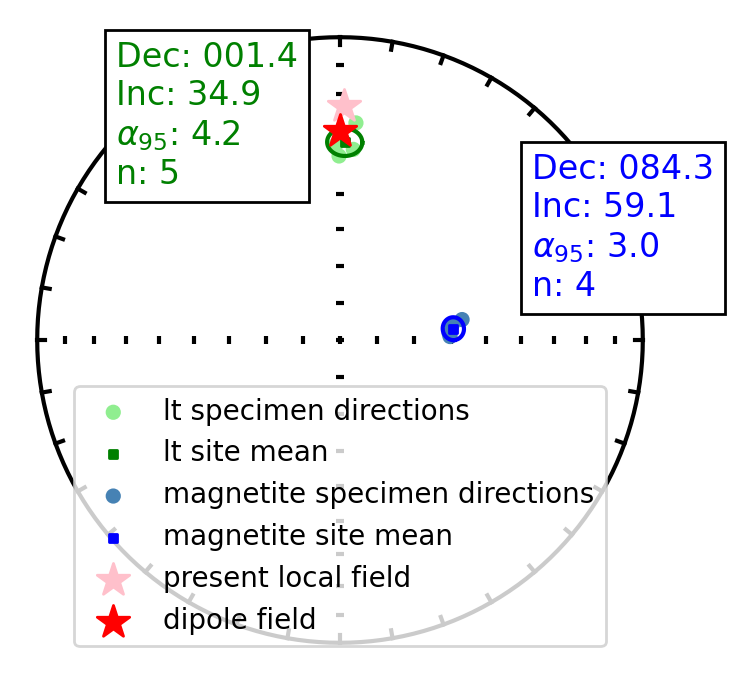

In [22]:
SD_specimen_data_gc_SD68 = SD_specimen_data_gc[SD_specimen_data_gc['site'] == 'SD68'].reset_index(drop=True)
SD68_mag = SD_specimen_data_gc_SD68[SD_specimen_data_gc_SD68['dir_comp'] == 'mag'].reset_index(drop=True)
SD68_lt = SD_specimen_data_gc_SD68[SD_specimen_data_gc_SD68['dir_comp'] == 'lt'].reset_index(drop=True)

SD68_mag_mean = ipmag.fisher_mean(SD68_mag['dir_dec'], SD68_mag['dir_inc'])
SD68_lt_mean = ipmag.fisher_mean(SD68_lt['dir_dec'], SD68_lt['dir_inc'])

plt.figure(figsize=(3.5,3.5))
ipmag.plot_net()
ipmag.plot_di(SD68_lt['dir_dec'], 
              SD68_lt['dir_inc'], 
              color='#90EE90', marker='o', label='lt specimen directions',
              markersize=20)
ipmag.plot_di_mean(SD68_lt_mean['dec'], SD68_lt_mean['inc'], SD68_lt_mean['alpha95'], 
                   color='green', marker='s', markersize = 10, label='lt site mean')
ipmag.plot_di(SD68_mag['dir_dec'], 
              SD68_mag['dir_inc'], 
              color='steelblue', marker='o', label='magnetite specimen directions',
              markersize=20)
ipmag.plot_di_mean(SD68_mag_mean['dec'], SD68_mag_mean['inc'], SD68_mag_mean['alpha95'], 
                   color='blue', marker='s', markersize = 10, label='magnetite site mean')
ipmag.plot_di(Mirbat_plf_dec, Mirbat_plf_inc, color='pink', marker='*', markersize = 150, label='present local field')
ipmag.plot_di(Mirbat_dipole_dec, Mirbat_dipole_inc, color='red', marker='*', markersize = 150, label='dipole field')
plt.legend(loc='lower center')
plt.text(0.8, 0.675, 
         f"Dec: 0{SD68_mag_mean['dec']:.1f}\nInc: {SD68_mag_mean['inc']:.1f}\n$\\alpha_{{95}}$: {SD68_mag_mean['alpha95']:.1f}\nn: {SD68_mag_mean['n']:.0f}", 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', 
         bbox=dict(facecolor='white', alpha=1),color='blue')
plt.text(0.15, 0.85, 
         f"Dec: 00{SD68_lt_mean['dec']:.1f}\nInc: {SD68_lt_mean['inc']:.1f}\n$\\alpha_{{95}}$: {SD68_lt_mean['alpha95']:.1f}\nn: {SD68_lt_mean['n']:.0f}", 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center',
         bbox=dict(facecolor='white', alpha=1),color='green')
plt.savefig('./output/SD68_data.pdf', dpi=300)
plt.show()

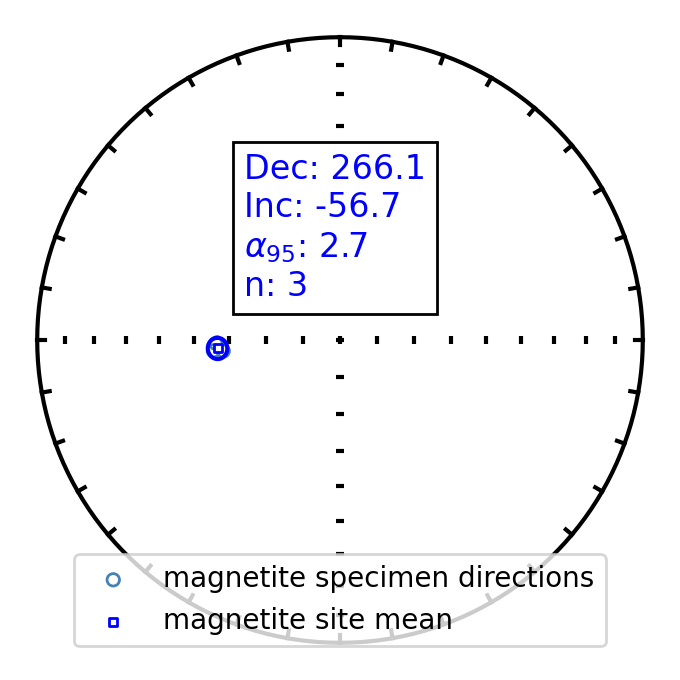

In [23]:
SD_specimen_data_gc_SD56 = SD_specimen_data_gc[SD_specimen_data_gc['site'] == 'SD56'].reset_index(drop=True)
SD56_mag = SD_specimen_data_gc_SD56[SD_specimen_data_gc_SD56['dir_comp'] == 'mag'].reset_index(drop=True)

SD56_mag_mean = ipmag.fisher_mean(SD56_mag['dir_dec'], SD56_mag['dir_inc'])

plt.figure(figsize=(3.5,3.5))
ipmag.plot_net()
ipmag.plot_di(SD56_mag['dir_dec'], 
              SD56_mag['dir_inc'], 
              color='steelblue', marker='o', label='magnetite specimen directions',
              markersize=20)
ipmag.plot_di_mean(SD56_mag_mean['dec'], SD56_mag_mean['inc'], SD56_mag_mean['alpha95'], 
                   color='blue', marker='s', markersize = 10, label='magnetite site mean')
# ipmag.plot_di(Mirbat_plf_dec, Mirbat_plf_inc, color='pink', marker='*', markersize = 150, label='present local field')
# ipmag.plot_di(Mirbat_dipole_dec, Mirbat_dipole_inc, color='red', marker='*', markersize = 150, label='dipole field')
plt.legend(loc='lower center')
plt.text(0.35, 0.675, 
         f"Dec: {SD56_mag_mean['dec']:.1f}\nInc: {SD56_mag_mean['inc']:.1f}\n$\\alpha_{{95}}$: {SD56_mag_mean['alpha95']:.1f}\nn: {SD56_mag_mean['n']:.0f}", 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='center', 
         bbox=dict(facecolor='white', alpha=1),color='blue')
plt.savefig('./output/SD56_data.pdf', dpi=300)
plt.show()

## Conglomerate test

17 clasts of diabase were sampled from within the diamictite of the Cryogenian Ayn Formation which was deposited unconformable atop the Tonian Shaat dikes. 16 yielded stable interpretable mag components.

The mag component passes a Watson conglomerate test and thus the mt remanence was acquired before the conglomerate of the Ayn Formation was deposited.

In [24]:
# get AynC specimen data
AynC_specimen_data = SD_specimen_data_gc[SD_specimen_data_gc['site'] == 'AynC'].reset_index(drop=True)
AynC_specimen_data_lt = AynC_specimen_data[AynC_specimen_data['dir_comp'] == 'lt'].reset_index(drop=True)
AynC_specimen_mag = AynC_specimen_data[AynC_specimen_data['dir_comp'] == 'mag'].reset_index(drop=True)
AynC_specimen_py = AynC_specimen_data[AynC_specimen_data['dir_comp'] == 'py'].reset_index(drop=True)

AynC_specimen_data_lt_dir_mean = ipmag.fisher_mean(AynC_specimen_data_lt['dir_dec'], AynC_specimen_data_lt['dir_inc'])

### present-local field

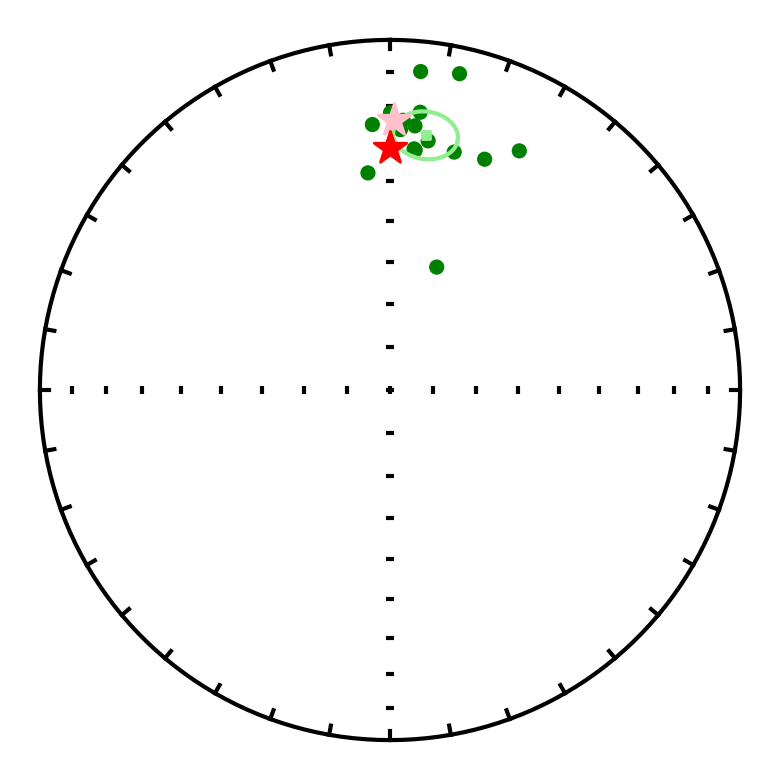

In [25]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(inc=AynC_specimen_data_lt['dir_inc'], dec=AynC_specimen_data_lt['dir_dec'], color='green', marker='o', label='AynC lt component directions')
# plot specimen lt mean direction
ipmag.plot_di_mean(AynC_specimen_data_lt_dir_mean['dec'], AynC_specimen_data_lt_dir_mean['inc'], AynC_specimen_data_lt_dir_mean['alpha95'], 
                   color='lightgreen', marker='s', markersize = 10, label='Shaat dikes present local field direction mean')
# plot Mirbat present local field direction
ipmag.plot_di(Mirbat_plf_dec, Mirbat_plf_inc, color='pink', marker='*', markersize = 150, label='Mirbat present local field direction')
ipmag.plot_di(Mirbat_dipole_dec, Mirbat_dipole_inc, color='red', marker='*', markersize = 150, label='Mirbat present local field direction')


### magnetite component

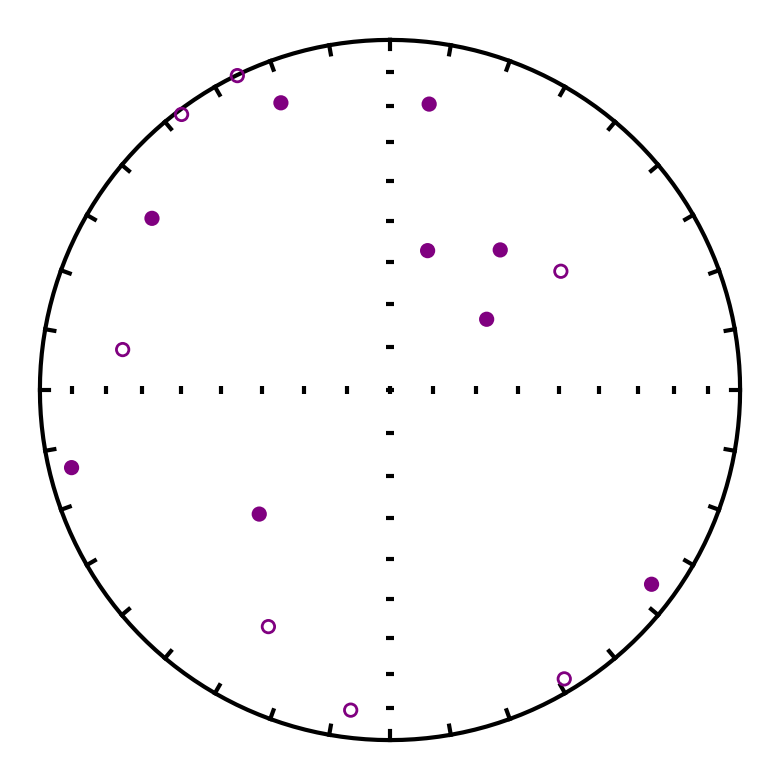

In [26]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(inc=AynC_specimen_mag['dir_inc'], dec=AynC_specimen_mag['dir_dec'], color='purple', marker='o', label='AynC mag component directions')

In [27]:
# do a pmag conglomerate test on the data
ipmag.conglomerate_test_Watson(ipmag.fisher_mean(AynC_specimen_mag['dir_dec'], AynC_specimen_mag['dir_inc'])['r'], len(AynC_specimen_mag['dir_dec']))

R = 3.8923699349091843
Ro_95 = 6.4
Ro_99 = 7.6
This population "passes" a conglomerate test as the null hypothesis of randomness cannot be rejected at the 95% confidence level


{'n': 16, 'R': 3.8923699349091843, 'Ro_95': 6.4, 'Ro_99': 7.6}

## Shaat dike baked contact test with host metamorphic basement

Samples of dike site SD19 are all within 0.5 meters of the margin of the dike which is about 5 meters wide. The S19B samples were collected at variable distances from the dike margin.

| Sample   | Distance from Margin (meters) | Comments                        |
|----------|-------------------------------|---------------------------------|
| S19B-1   | on margin                     | complete dike direction overprint (up to 590ºC)                                |
| S19B-2   | on margin                     | complete dike direction overprint (up to 590ºC) |
| S19B-3   | on margin                     | complete dike direction overprint (up to 590ºC) |
| S19B-4   | on margin                     | complete dike direction overprint (up to 590ºC) |
| S19B-5   | 0.08                          | complete dike direction overprint (up to 590ºC) |
| S19B-6   | on margin                     | complete dike direction overprint (up to 590ºC) |
| S19B-7   | 7.5                           | distinct direction with no dike overprint (unblocks above magnetite Curie temperature) |
| S19B-8   | 7.1                           | no data |
| S19B-9   | 8.1                           | distinct direction with no dike overprint (unblocks above magnetite Curie temperature) |
| S19B-10  | 76                            | incomplete data |
| S19B-11  | 76                            | no dike overprint with distinct poorly resolved direction |
| S19B-12  | 76                            | no dike overprint with distinct direction |
| S19B-13  | 0.4                           | complete dike direction overprint (up to 590ºC) |
| S19B-14  | 0.6                           | complete dike direction overprint (up to 590ºC) |
| S19B-15  | 0.9                           | complete dike direction overprint (up to 590ºC) |
| S19B-16  | 1.4                           | partial dike overprint heading to distinct direction above 560ºC (dike overprint fit from 500 to 550ºC as 'mt')                               |
| S19B-17  | 1.7                           | partial dike overprint heading to distinct stable end point direction above 560ºC similar to the direction of S19B-22 (dike overprint fit from 500 to 555ºC as 'mt') |
| S19B-18  | 3.6                           | no dike overprint with distinct direction |
| S19B-19  | 3.3                           | partial dike overprint poorly resolved up to 340ºC then in distinct direction (dike overprint fit from 280 to 340ºC as 'mt') |
| S19B-20  | 1.8                           | partial dike overprint heading to distinct direction above 560ºC similar to the direction of S19B-22 (dike overprint fit from 500 to 550ºC as 'mt') |
| S19B-21  | 2.2                           | dike overprint unblocks up to ~520ºC |
| S19B-22  | 4.8                           | distinct direction through magnetite unblocking |

That overprints go from complete (S19B-13) to nearly complete (S19B-16) to partial (S19B-17) to absent (S19B-22) moving away from the dike indicates a positive baked contact test. Specimens at the contact pass Watson and bootstrap common mean tests with the dike direction.

In [28]:
# get SD19 specimen and site data
SD19_specimen_data = SD_specimen_data_gc[(SD_specimen_data_gc['site'] == 'SD19') & (SD_specimen_data_gc['dir_comp'] == 'mag')].reset_index(drop=True)
SD19_site_data = SD_site_data_gc[SD_site_data_gc['site'] == 'SD19'].reset_index(drop=True)
SD19_specimen_data

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,...,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site,specimen_name
0,SD19-1,SD19-1_LP-DIR-T,SD19-1,NaN,mag,285.5,-72.6,3.0,10.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,SD19,SD19-1
1,SD19-2,SD19-2_LP-DIR-T,SD19-2,NaN,mag,278.4,-73.6,2.0,10.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,SD19,SD19-2
2,SD19-3,SD19-3_LP-DIR-T,SD19-3,NaN,mag,281.8,-59.1,2.0,12.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,SD19,SD19-3
3,SD19-4,SD19-4_LP-DIR-T,SD19-4,NaN,mag,264.2,-65.3,2.0,10.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,SD19,SD19-4
4,SD19-5,SD19-5_LP-DIR-T,SD19-5,NaN,mag,272.4,-75.4,2.0,7.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,SD19,SD19-5
5,SD19-6,SD19-6_LP-DIR-T,SD19-6,NaN,mag,272.9,-62.6,2.0,12.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,SD19,SD19-6


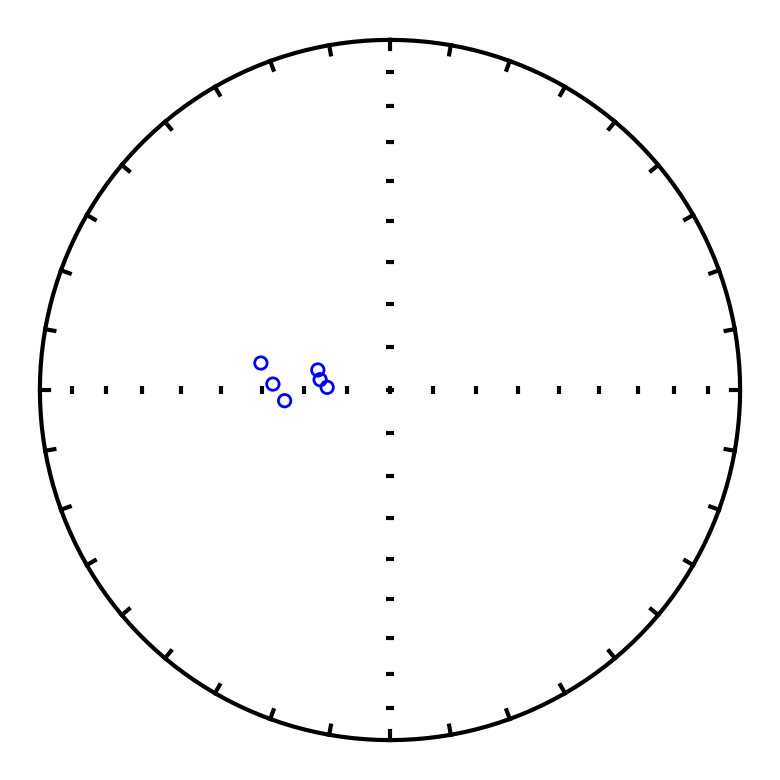

In [29]:
# show SD19 specimen direction
plt.figure(figsize=(4,4))
ipmag.plot_net()
ipmag.plot_di(inc=SD19_specimen_data['dir_inc'], dec=SD19_specimen_data['dir_dec'], color='blue', marker='o', label='SD19')

In [30]:
## get SD19B baked basement rock data

S19B_specimen_data_mt = SD_specimen_data_gc[(SD_specimen_data_gc['site'] == 'S19B') & (SD_specimen_data_gc['dir_comp'] == 'mag')].reset_index(drop=True)
S19B_specimen_data_ht = SD_specimen_data_gc[(SD_specimen_data_gc['site'] == 'S19B') & (SD_specimen_data_gc['dir_comp'] == 'hem')].reset_index(drop=True)

S19B_specimen_data_mt_close = S19B_specimen_data_mt[(S19B_specimen_data_mt['specimen'] != 'S19B-11') & (S19B_specimen_data_mt['specimen'] != 'S19B-12')].reset_index(drop=True)
S19B_specimen_data_mt_far = S19B_specimen_data_mt[(S19B_specimen_data_mt['specimen'] == 'S19B-11') | (S19B_specimen_data_mt['specimen'] == 'S19B-12')].reset_index(drop=True)

S19B_specimen_data_mt_far


,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,...,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site,specimen_name
0,S19B-12,S19B-12_LP-DIR-T,S19B-12,NaN,mag,221.3,11.2,2.0,10.0,0.0,...,pmagpy-4.2.124: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-GEO,g,NaN,NaN,Zalawt plain,S19B,S19B-12


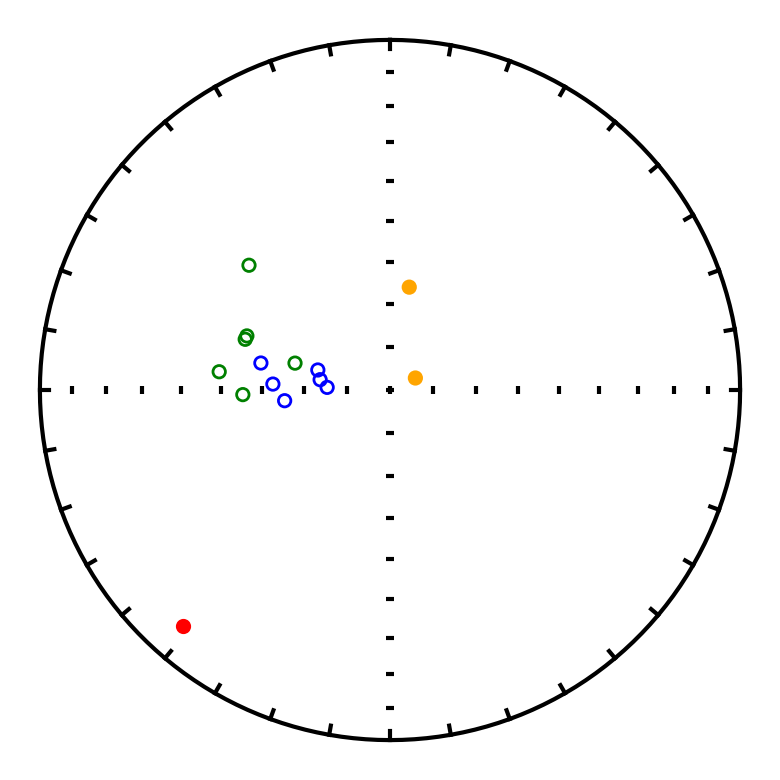

In [31]:
plt.figure(figsize=(4,4))
ipmag.plot_net()
# let's first plot the SD19 directions
ipmag.plot_di(inc=SD19_specimen_data['dir_inc'], dec=SD19_specimen_data['dir_dec'], color='blue', marker='o', label='SD19')

# next let's plot the specimens S19B 1-6 which are closest to the SD19 dike
ipmag.plot_di(inc=S19B_specimen_data_mt_close['dir_inc'], dec=S19B_specimen_data_mt_close['dir_dec'], color='green', marker='o', label='S19B 0.08m to dike')

# next let's plot the specimens S19B 7-9 which are 7 meters from the dike; specimens 7 and 9 have hematite remanence, specimen 8 is gone. 
ipmag.plot_di(inc=S19B_specimen_data_ht['dir_inc'], dec=S19B_specimen_data_ht['dir_dec'], color='orange', marker='o', label='S19B 7m to dike')

# next let's plot the specimens S19B 10-12 data which are 76 meters from the dike
ipmag.plot_di(inc=S19B_specimen_data_mt_far['dir_inc'], dec=S19B_specimen_data_mt_far['dir_dec'], color='red', marker='o', label='S19B 76m from dike')

# plt.legend(loc='lower right')
plt.show()

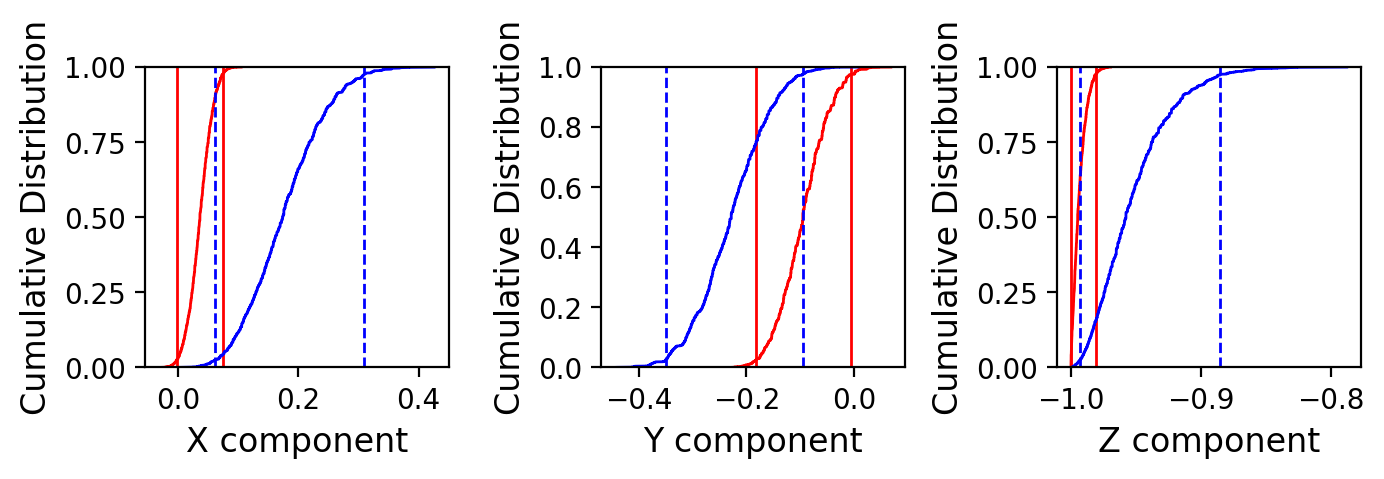

Pass


1

In [32]:
# conduct a common mean test between specimens of SD19 and S19B 1-6
ipmag.common_mean_bootstrap(SD19_specimen_data[['dir_inc','dir_dec']].to_numpy(), 
                            S19B_specimen_data_mt_close[['dir_inc', 'dir_dec']].to_numpy())

In [33]:
ipmag.common_mean_watson(SD19_specimen_data[['dir_inc','dir_dec']].to_numpy(), 
                            S19B_specimen_data_mt_close[['dir_inc', 'dir_dec']].to_numpy())

Results of Watson V test: 

Watson's V:           5.3
Critical value of V:  7.6
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 11.3
Critical angle for M&M1990:   13.5
The McFadden and McElhinny (1990) classification for
this test is: 'C'


(1, 11.271510837217107, 13.529957106293216, 'C')

In [34]:
ipmag.common_mean_bayes(SD19_specimen_data[['dir_inc','dir_dec']].to_numpy(), 
                            S19B_specimen_data_mt_close[['dir_inc', 'dir_dec']].to_numpy())

Ambiguous: weak support


(1.8637432303863273, 0.6508066821811056, 'Ambiguous: weak support')

## Field test results summary

The positive reversal text, positive conglomerate test from the AynC clasts, and the result of the baked contact test on the host rocks support that the magnetite remanence component is a primary magnetization.

## Previous Neoproterozoic data

Kilner et al. paleopole:
> paleopole at 52.38S, 074.48E (N 5 25 sites;a95 5 7.38).

In [35]:
Kilner_plat = -52.38
Kilner_plon = 74.48
Kilner_A95 = 7.3
Kilner_pole_Mirbat_dec, Kilner_pole_Mirbat_inc = pmag.vgp_di(Kilner_plat,Kilner_plon,Mirbat_area_lat,Mirbat_area_lon)
Kilner_pole_Mirbat_dec - SD_sites_Leger_all_mag_tc_unified_mean['dec']

87.04281235797154

In [36]:
pole_Mirbat_dec, pole_Mirbat_inc = pmag.vgp_di(mean_Shaat_pole_all['inc'],mean_Shaat_pole_all['dec'],Mirbat_area_lat,Mirbat_area_lon)
pole_Mirbat_dec

80.42673618012788

In [37]:
Kempf_plat = 23.3
Kempf_plon = 141.8
Kempf_A95 = np.sqrt(3.9*7.5)

In [38]:
Kempf_dec = 68.4
Kempf_inc = 18.4
Kempf_a95 = 7.2
Kempf_inc_0_6 = ipmag.unsquish(incs=Kempf_inc,f=0.6)

In [50]:
Kempf_paleolat = ipmag.lat_from_inc(Kempf_inc)
Kempf_paleolat

9.44343375324366

In [51]:
Shaat_all_pole_paleolat-Kempf_paleolat

28.089205866668003

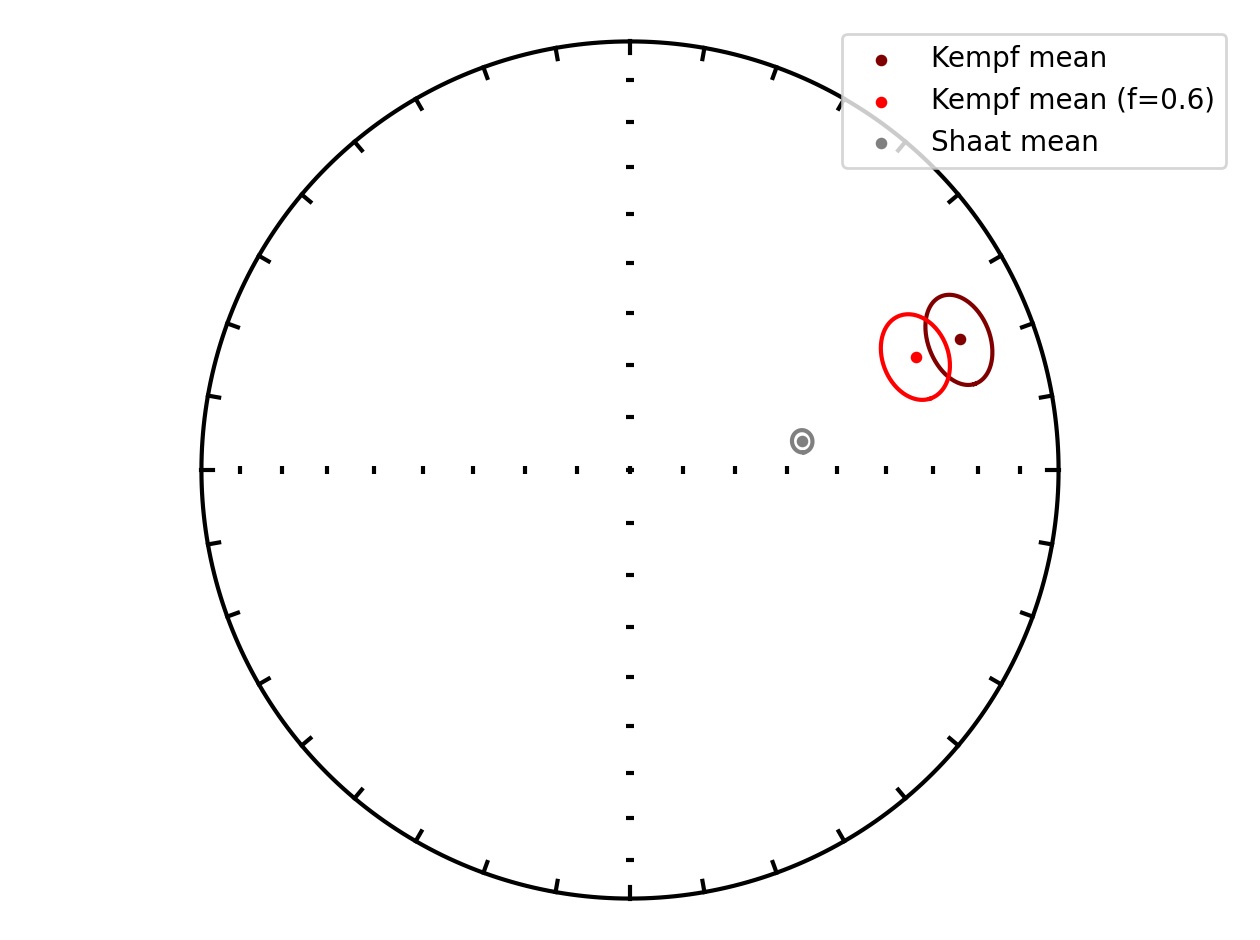

In [39]:
Shaat_mean = SD_sites_Leger_all_mag_tc_unified_mean

ipmag.plot_net()
ipmag.plot_di_mean(Kempf_dec, Kempf_inc, Kempf_a95, color='maroon', marker='o', markersize=10, label='Kempf mean')
ipmag.plot_di_mean(Kempf_dec, Kempf_inc_0_6, Kempf_a95, color='red', marker='o', markersize=10, label='Kempf mean (f=0.6)')

ipmag.plot_di_mean(Shaat_mean['dec'], Shaat_mean['inc'], Shaat_mean['alpha95'], color='grey', marker='o', 
                   markersize=10, label='Shaat mean')
plt.legend()
plt.show()

In [40]:
def find_compilation_kent(plon, plat, A95, slon, slat,
                          f_from_compilation=None, n=10000, n_fish=100,
                          return_poles=False, return_kent_stats=True,
                          return_paleolats=False, map_central_longitude=0,
                          map_central_latitude=0):
    
    """
    Applies flattening factors from the compilation to sedimentary paleomagnetic pole where only
    pole longitude, pole latitude, A95, site longitude, and site latitude are available.

    First, calculate the paleomagnetic direction at the site of the mean pole using plon, plat via
    pmag.vgp_di. Then draw n resamples from the compiled f values in the compilation. The default
    compilation of Pierce et al., 2022 can be used or the user can provide their own compilation.

    Unsquish the directions with the resampled f factors, then convert the mean directions back to pole
    space. Making the simplifying assumption that A95 is the same as the directions are unflattened.
    Resample n_fish mean poles from the Fisher distribution given the unsquished plon, plat, and A95.
    This will result in a total of n*n_fish number of resampled mean poles. Summarize the distribution
    of the mean poles using a Kent distribution.

    Parameters:
        plon: legacy mean pole longitude
        plat: legacy mean pole latitude
        A95: legacy mean pole A95
        slon: site longitude
        slat: site latitude
        f_from_compilation: list of f factors (default is None in which case the compilation of
            Pierce et al., 2022 Table S1 will be used)
        n: number of resamples from compilation (default is 10000)
        n_fish: number of resamples from each Fisher mean pole position (default is 100)
        return_poles: whether or not to return the resampled mean pole positions (default is False)
        return_kent_stats: whether or not to return the calculated Kent distribution statistics of
            the resampled mean poles (default is True)
        return_paleolats: whether or not to return the computed compilation paleolatitudes (default is
            False)
        map_central_longitude: central longitude for the orthographic map (default is 0)
        map_central_latitude: central latitude for the orthographic map (default is 0)

    Returns:
        Depending on the combination of boolean flags provided, returns one or more of:
        - compilation_mean_lons, compilation_mean_lats: resampled mean pole positions
        - f_compilation_kent_distribution_95: Kent distribution statistics
        - compilation_paleolats: computed compilation paleolatitudes
    """
    # get the uncorrected declination and inclination from a given paleomagnetic pole
    original_dec, original_inc = pmag.vgp_di(plat, plon, slat, slon)

    if f_from_compilation is None:
        # compilation f value list
        f_from_compilation = pd.Series(
            [
                0.49, 0.77, 0.63, 0.59, 0.57, 0.4, 0.63, 0.66, 0.63, 0.49, 0.49,
                0.58, 0.54, 0.73, 0.97, 0.59, 0.84, 0.9, 0.78, 0.83, 0.58, 0.94,
                0.78, 0.9, 0.68, 0.48, 0.67, 0.66, 0.7, 0.43, 0.45, 0.58, 0.58,
                0.53, 0.42, 0.51, 0.61, 0.52, 0.62, 0.73, 0.66, 0.55, 0.47, 0.77,
                0.62, 0.54, 0.46, 0.56, 0.64, 0.47, 0.48, 0.44, 0.52, 0.65, 0.81,
                0.64, 0.71, 0.79, 0.65, 0.56, 0.69, 0.43, 0.7, 0.67, 0.65, 0.49,
                0.54, 0.64, 0.83, 0.68
            ]
        )
    else:
        f_from_compilation = pd.Series(f_from_compilation)

    f_resample = f_from_compilation.sample(n=n, replace=True).tolist()

    plt.figure(figsize=(6, 6))
    plt.hist(f_resample, alpha=0.6, density=1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("resample of compilation f factors", fontsize=16)
    plt.ylabel("density", fontsize=16)

    # calculate corrected inclinations
    compilation_incs = [pmag.unsquish(original_inc, f) for f in f_resample]
    # calculate corrected paleolatitudes
    compilation_paleolats = np.degrees(np.arctan(np.tan(np.radians(compilation_incs)) / 2))

    plt.figure(figsize=(6, 6))
    plt.hist(compilation_paleolats, alpha=0.6, density=1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("compilation paleolatitudes ($^\circ$)", fontsize=16)
    plt.ylabel("density", fontsize=16)

    compilation_mean_lons = []
    compilation_mean_lats = []

    for i in range(len(f_from_compilation)):
        unsquish_plon, unsquish_plats, _, _ = pmag.dia_vgp(
            original_dec, compilation_incs[i], A95, slat, slon)
        resampled_lons, resampled_lats = ipmag.fisher_mean_resample(
            alpha95=A95,
            n=n_fish,
            dec=unsquish_plon,
            inc=unsquish_plats,
            di_block=0)
        compilation_mean_lons.extend(resampled_lons)
        compilation_mean_lats.extend(resampled_lats)

    m = ipmag.make_orthographic_map(map_central_longitude, map_central_latitude)
    ipmag.plot_vgp(
        m,
        compilation_mean_lons,
        compilation_mean_lats,
        color="lightgrey",
        edge="none",
        markersize=5,
        alpha=0.002)

    f_compilation_kent_distribution_95 = ipmag.kent_distribution_95(
        dec=compilation_mean_lons, inc=compilation_mean_lats)
    ipmag.print_kent_mean(f_compilation_kent_distribution_95)
    ipmag.plot_pole_ellipse(
        m, f_compilation_kent_distribution_95, color="darkred", label="Kent mean pole")
    ipmag.plot_pole(
        m, plon, plat, A95, label="uncorrected pole position", color="C0")
    plt.legend(loc=8, fontsize=14)

    results = []
    if return_poles:
        results.extend([compilation_mean_lons, compilation_mean_lats])
    if return_kent_stats:
        results.append(f_compilation_kent_distribution_95)
    if return_paleolats:
        results.append(compilation_paleolats)

    if len(results) == 1:
        return results[0]
    return tuple(results)

Plon: 135.3  Plat: 24.7
Major axis lon: 40.4  Major axis lat: 10.7
Minor axis lon: 288.9  Minor axis lat: 62.8
Major axis angle of 95% ellipse (Zeta): 8.7
Minor axis angle of 95% ellipse (Eta): 5.5
Number of directions in mean (n): 70000


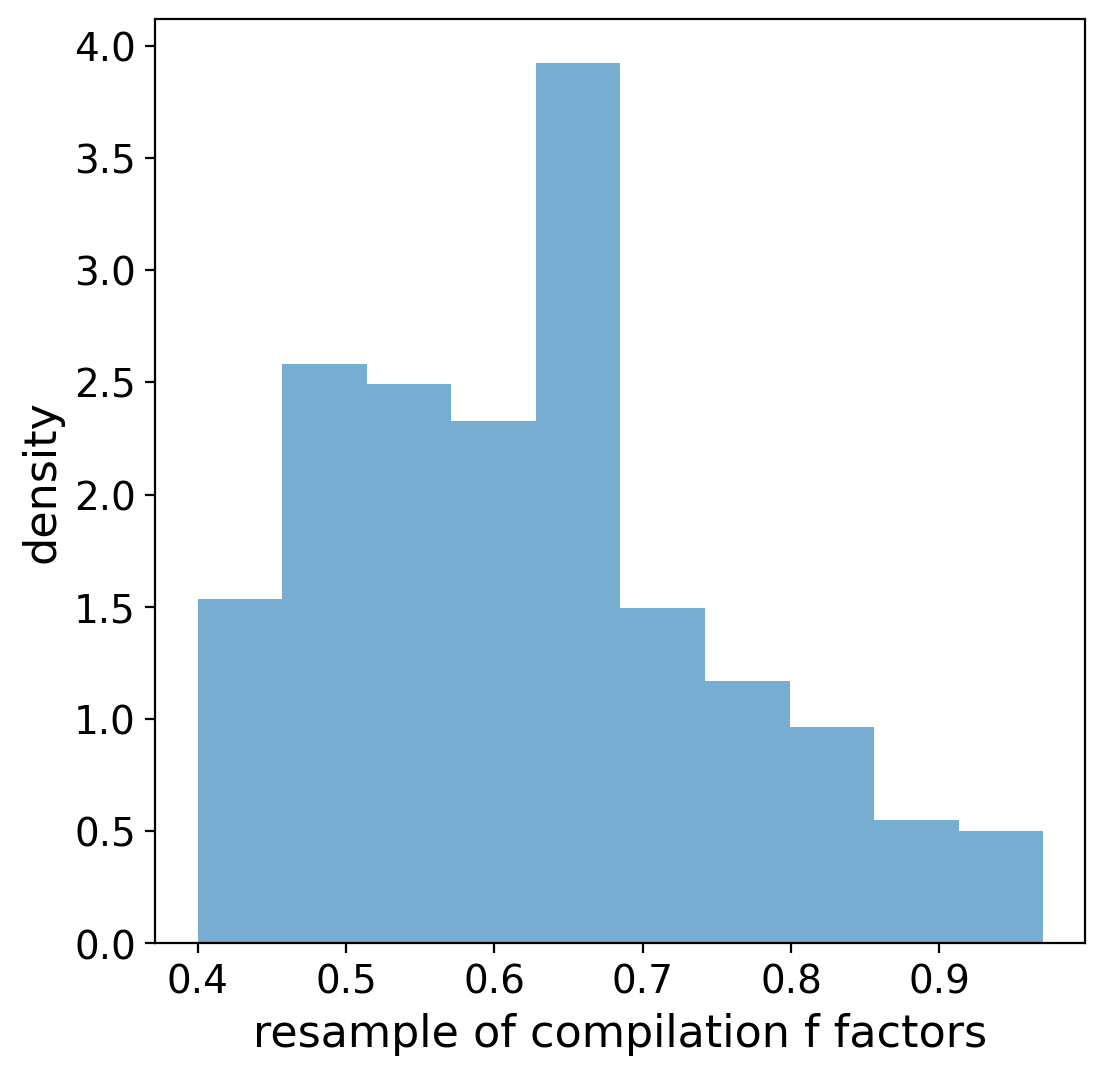

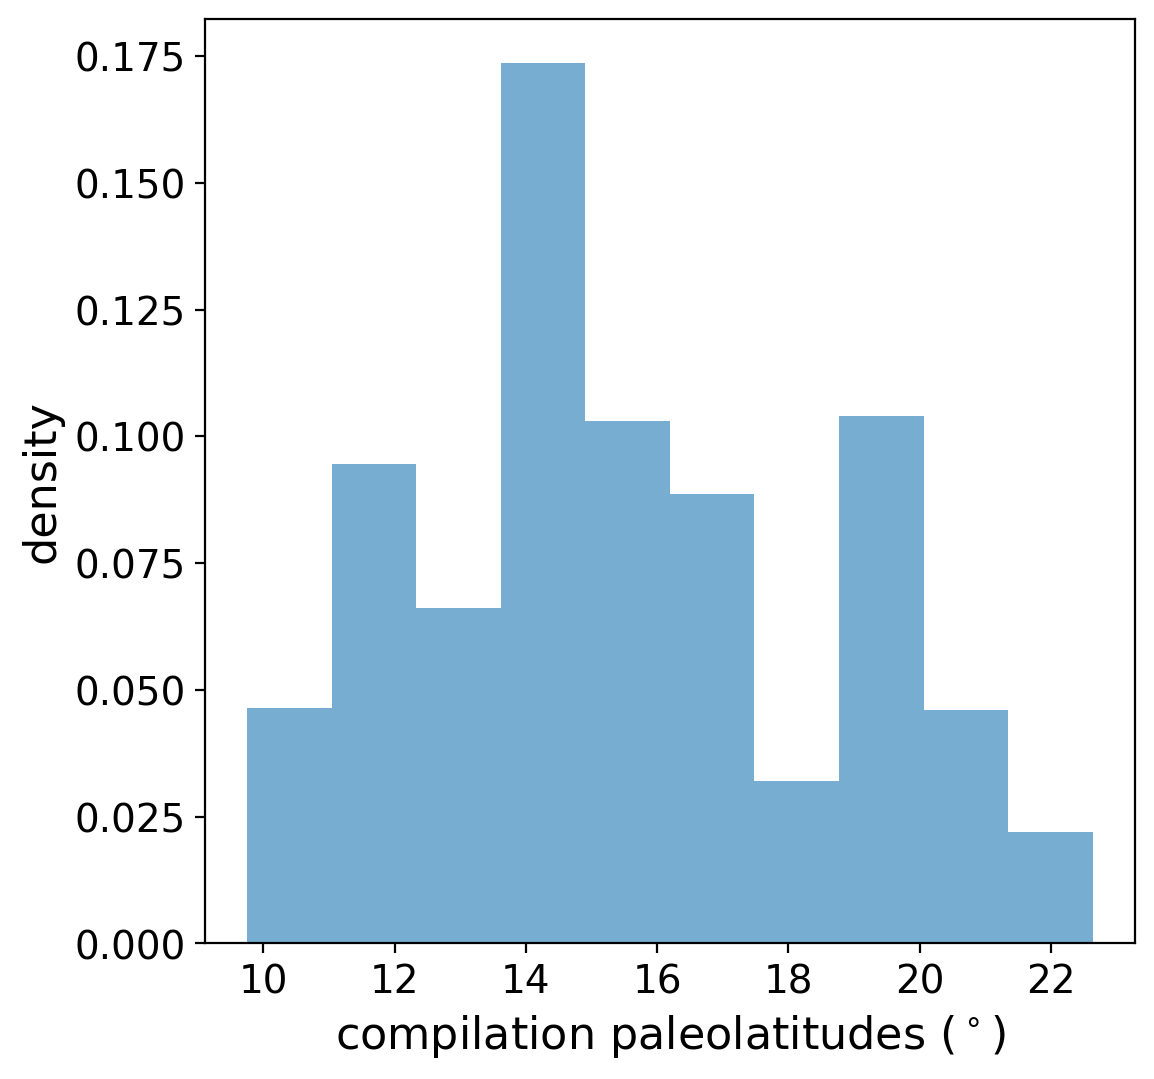

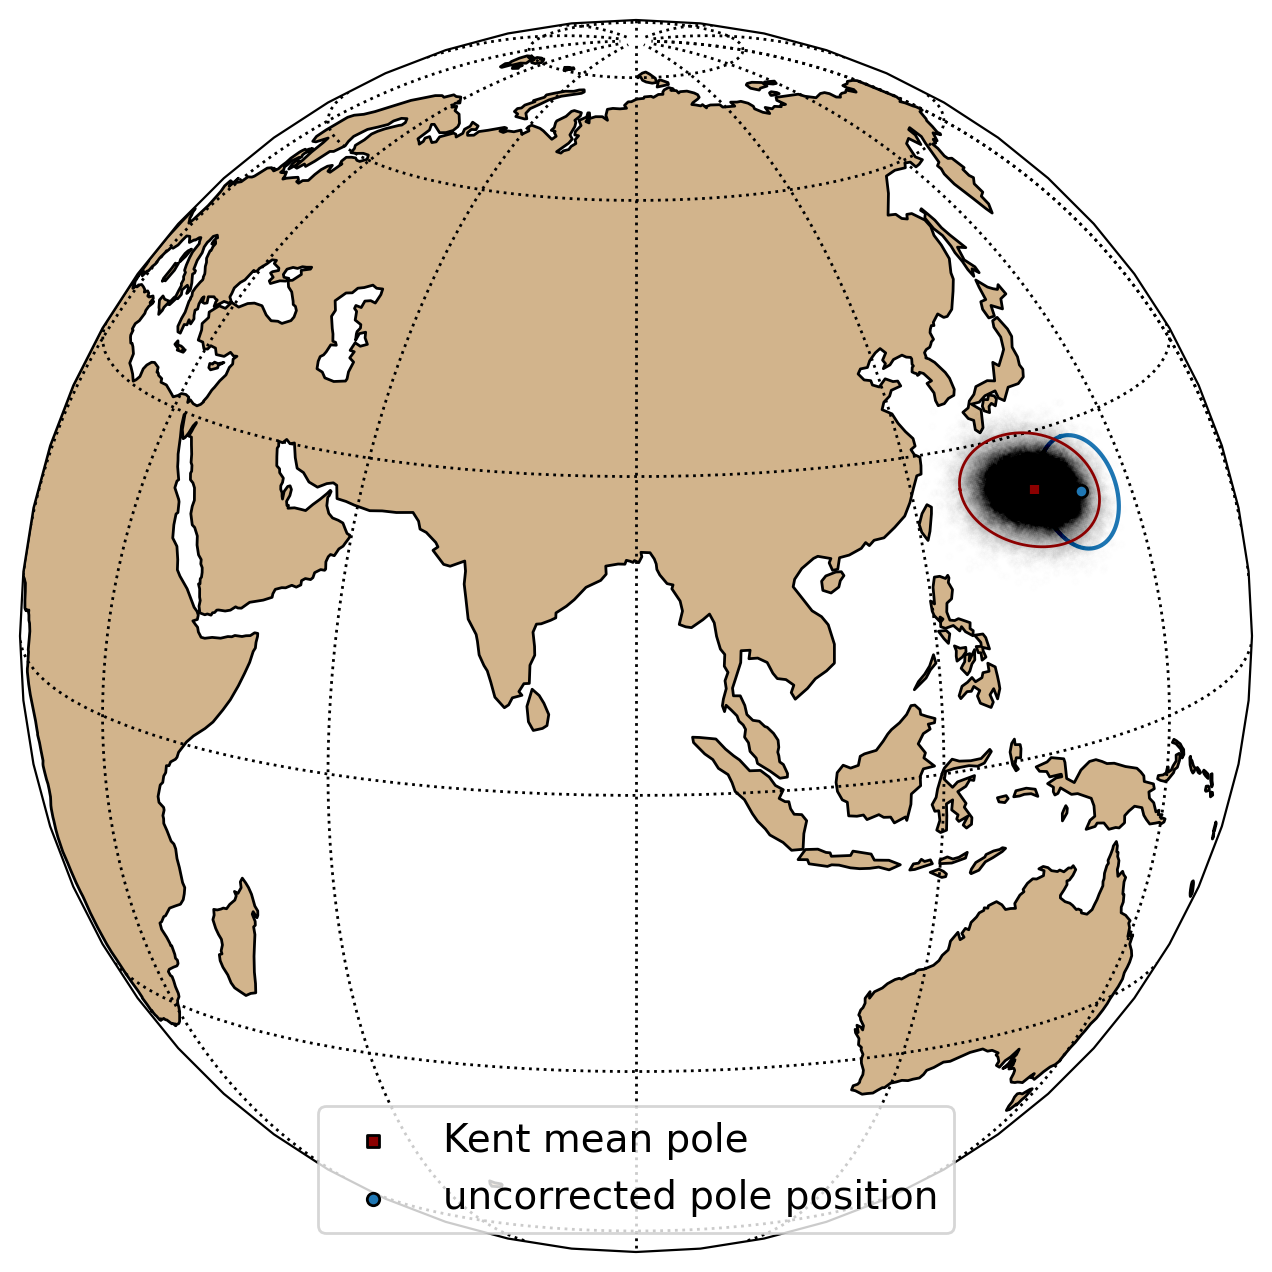

In [45]:
Kempf_pole_kent, paleolatitudes = find_compilation_kent(Kempf_plon, Kempf_plat, Kempf_A95, 
                                        Mirbat_area_lon, Mirbat_area_lat,
                                        map_central_longitude=90, map_central_latitude=15
                                        ,n=10000,n_fish=1000,return_poles=False,return_paleolats=True)

In [46]:
paleolatitudes

array([19.92806022305915 , 14.827144392104202, 14.605450095269957, ...,
       13.4006971410624  , 18.108000858453863, 18.79611410881158 ])

In [47]:
np.percentile(paleolatitudes, [2.5, 97.5])

array([10.060591107930794, 21.656910264253373])

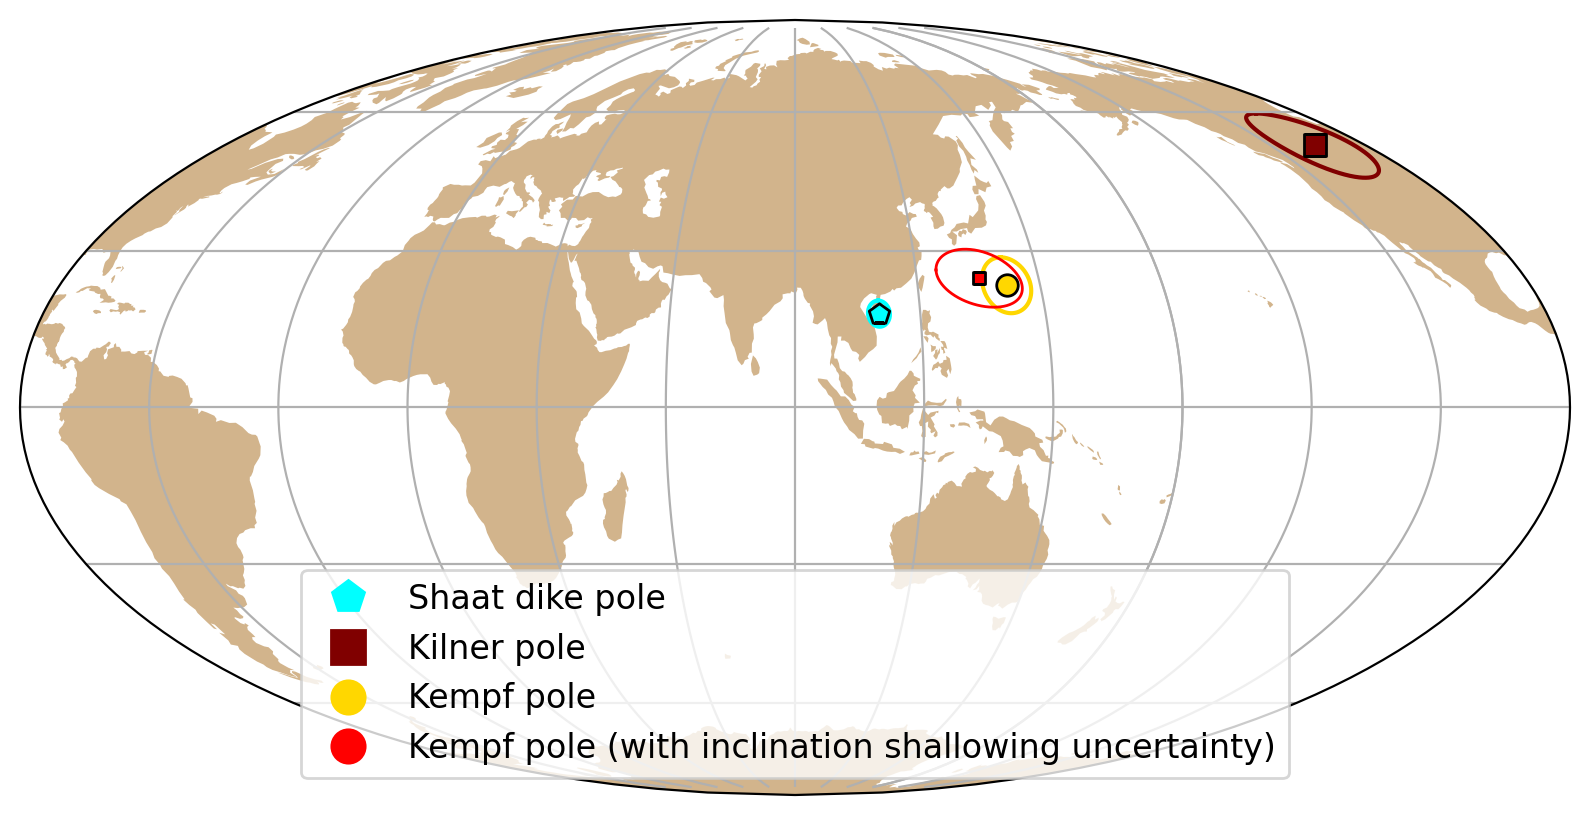

In [ ]:
import matplotlib
import matplotlib.colors as colors

map_axis = ipmag.make_mollweide_map(central_longitude=90,
                                       figsize=(10,10),land_edge_color=None)
ipmag.plot_pole(map_axis, mean_Shaat_pole_all['dec'], mean_Shaat_pole_all['inc'], mean_Shaat_pole_all['alpha95'], 
                marker='p',color='aqua', markersize=60)
ipmag.plot_pole(map_axis, Kilner_plon+180, -Kilner_plat, Kilner_A95, 
                marker='s',color='maroon', markersize=60)
ipmag.plot_pole(map_axis, Kempf_plon, Kempf_plat, Kempf_A95, 
                marker='o',color='gold', markersize=60)
ipmag.plot_pole_ellipse(map_axis,Kempf_pole_kent, color='r')

# Create custom legend elements
mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='Shaat dike pole')
kilner_pole = mlines.Line2D([], [], color='maroon', marker='s', linestyle='None', markersize=12, label='Kilner pole')
kempf_pole = mlines.Line2D([], [], color='gold', marker='o', linestyle='None', markersize=12, label='Kempf pole')
kempf_pole_ellipse = mlines.Line2D([], [], color='r', marker='o', linestyle='None', markersize=12, label='Kempf pole (with inclination shallowing uncertainty)')

# Add the legend to the plot
plt.legend(handles=[mean_pole, kilner_pole, kempf_pole, kempf_pole_ellipse], loc='lower center', fontsize=12)

plt.show()


Need to rotate poles into South Africa coordinates:
37.1 17.2 −8.9

In [ ]:
Gondwana_APWP = pd.read_csv('../data/APWP/Torsvik2012a_Gondwana_APWP.csv')
Gondwana_Cambrian = Gondwana_APWP[(Gondwana_APWP['age'] <= 540) & (Gondwana_APWP['age'] >= 490)]
Gondwana_Cambrian.reset_index(drop=True, inplace=True)
Gondwana_Cambrian

,age,N_poles,RM_A95,RM_Plat,RM_Plon,RM_f0_6_A95,RM_f0_6_Plat,RM_f0_6_Plon,Spline_Plat,Spline_Plon,Spline_GCD
0,490,7.0,4.2,32.8,7.8,13.4,30.8,7.9,34.3,12.9,5.5
1,500,10.0,10.7,25.2,6.5,10.7,25.2,6.5,30.7,10.7,6.7
2,510,9.0,7.8,16.9,4.4,7.9,17.0,4.2,19.9,4.0,2.9
3,520,11.0,9.2,13.6,357.8,9.4,13.8,357.1,9.3,351.0,7.5
4,530,7.0,13.5,7.7,347.0,13.8,8.5,344.7,4.2,339.8,6.5
5,540,4.0,30.9,-6.9,332.1,32.4,-3.9,326.8,-1.3,328.6,3.2


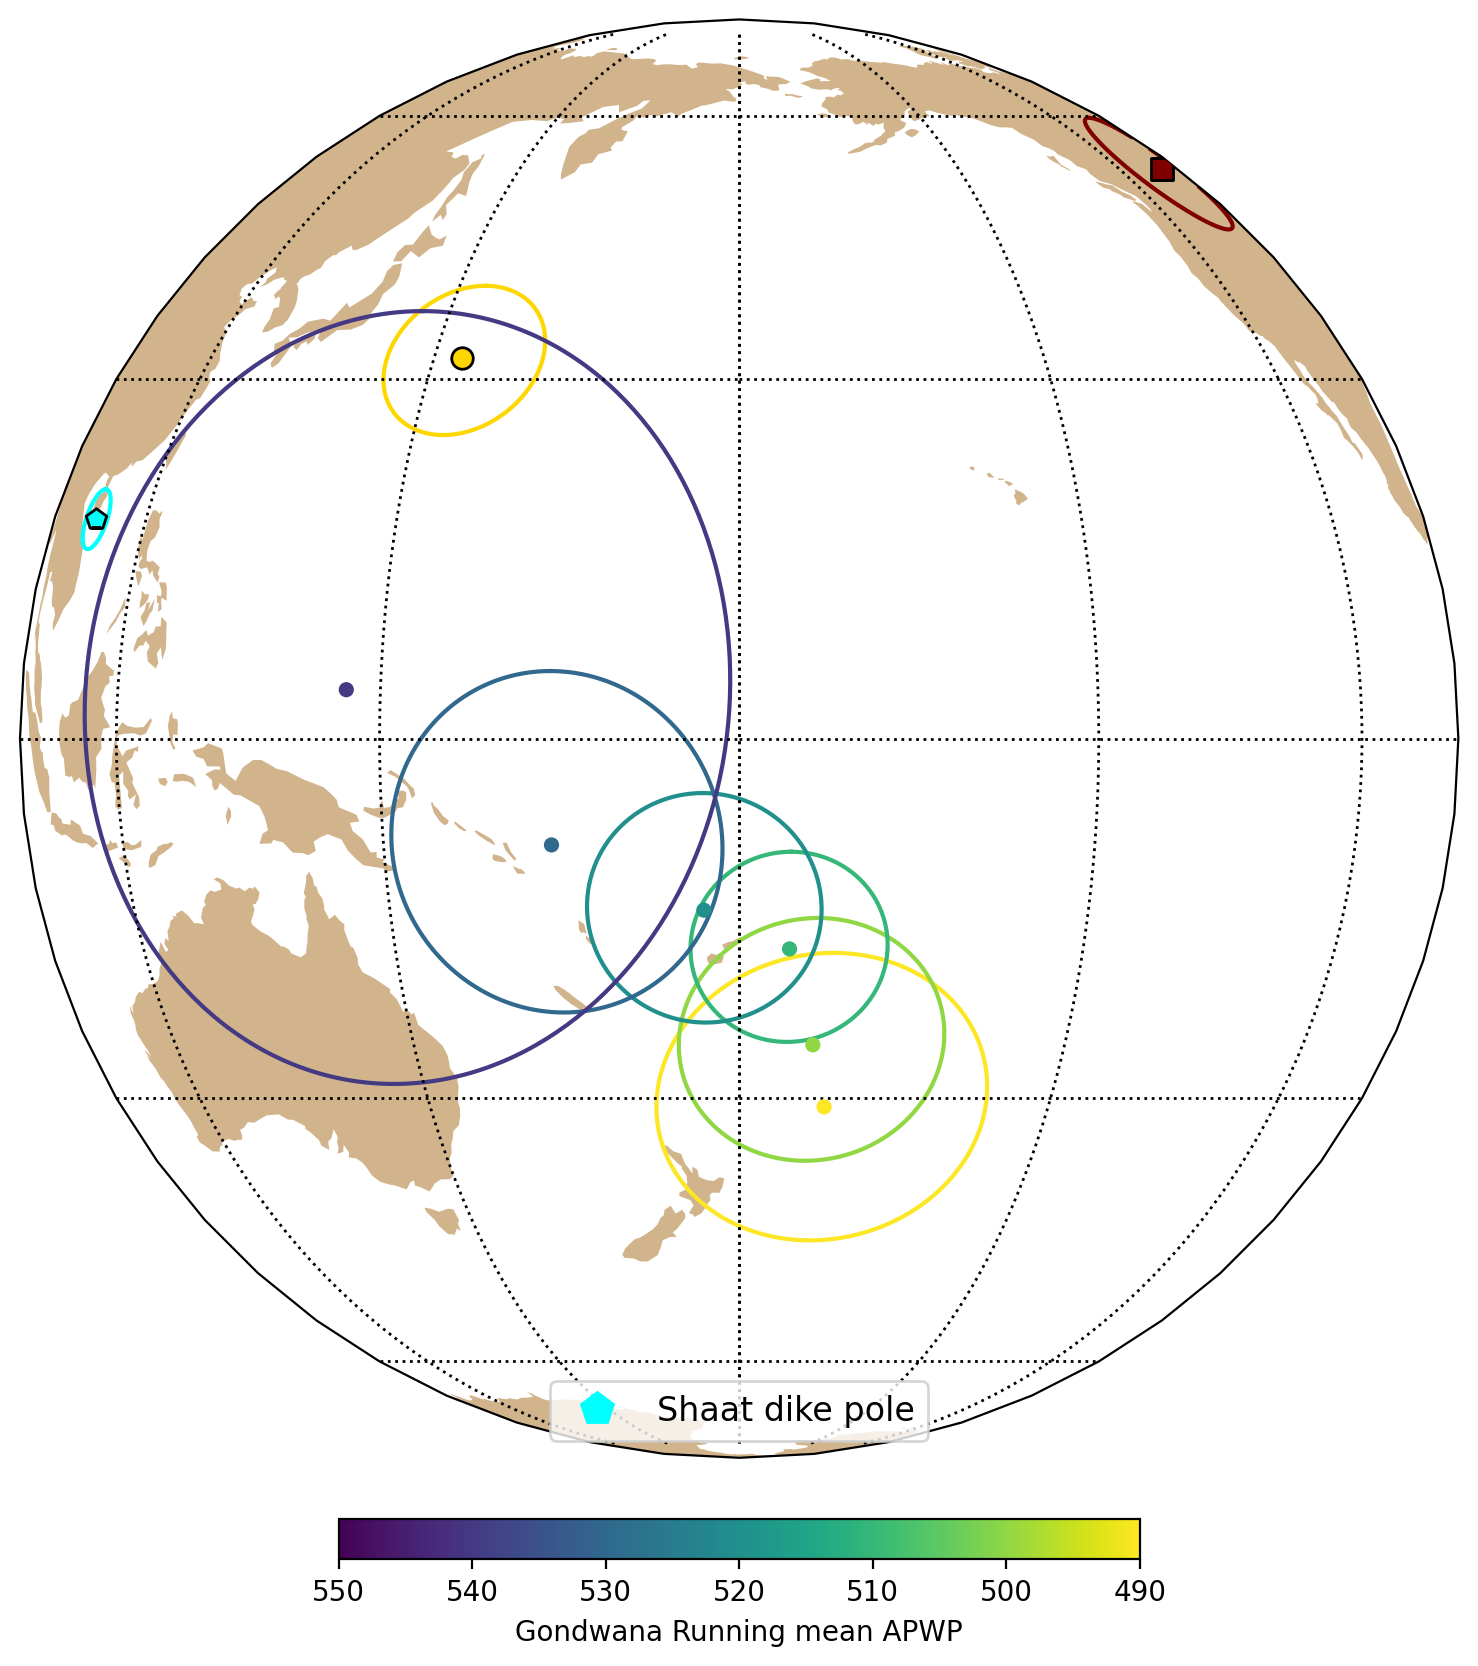

In [ ]:
map_axis = ipmag.make_orthographic_map(central_longitude=180,
                                       figsize=(10,10),land_edge_color=None)
ipmag.plot_pole(map_axis, mean_Shaat_pole_all['dec'], mean_Shaat_pole_all['inc'], mean_Shaat_pole_all['alpha95'], 
                marker='p',color='aqua', markersize=60)
ipmag.plot_pole(map_axis, Kilner_plon+180, -Kilner_plat, Kilner_A95, 
                marker='s',color='maroon', markersize=60)
ipmag.plot_pole(map_axis, Kempf_plon, Kempf_plat, Kempf_A95, 
                marker='o',color='gold', markersize=60)

vmin=490
vmax=550
cNorm = colors.Normalize(vmin, vmax)
Gondwana_scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

for n in range(Gondwana_Cambrian.shape[0]):
    rgba = Gondwana_scalarMap.to_rgba(Gondwana_Cambrian['age'][n])
    hex_color = colors.rgb2hex(rgba)
    ipmag.plot_pole(map_axis,Gondwana_Cambrian['RM_f0_6_Plon'][n]+180,
                    -Gondwana_Cambrian['RM_f0_6_Plat'][n],
                    Gondwana_Cambrian['RM_f0_6_A95'][n],
                    color=hex_color, markersize=30, edgecolor='none')
    

mean_pole = mlines.Line2D([], [], color='aqua', marker='p', linestyle='None', markersize=12, label='Shaat dike pole')

# Add the legend to the plot
plt.legend(handles=[mean_pole], loc='lower center', fontsize=12)
cbar=plt.colorbar(Gondwana_scalarMap, orientation='horizontal', fraction=0.026, pad=0.04)
cbar.set_label('Gondwana Running mean APWP')
cbar.ax.invert_xaxis()

plt.show()